In [1]:
# Import Section
import csv
import codecs
import sys
import io
import numpy as np
import pandas as pd
import scipy as sp

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statistics import mean

from sklearn import tree
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge

# Python script for confusion matrix creation. 
from sklearn.metrics import *
from numpy import mean
from numpy import std
from sklearn import metrics

import catboost as cb

In [2]:
dataset=pd.read_excel("Des_cod_1056_92-29.xlsx",index_col=0)

In [3]:
dataset.shape

(1056, 30)

In [4]:
dataset

,Number of atoms,Relative number of N atoms,Relative number of Cl atoms,Wiener index,Kier&Hall index (order 3),Average Information content (order 0),Balaban index,Max partial charge for a N atom [Zefirov's PC],Min partial charge for a N atom [Zefirov's PC],Polarity parameter / square distance,...,Max net atomic charge for a C atom,Tot dipole of the molecule,Image of the Onsager-Kirkwood solvation energy,RNCS Relative negative charged SA (SAMNEG*RNCG) [Quantum-Chemical PC],Max SIGMA-SIGMA bond order,Max PI-PI bond order,Min valency of a N atom,Avg valency of a N atom,Min (0.1) bond order of a N atom,Act
Structure,,,,,,,,,,,,,,,,,,,,,
"""1Co""",101,0.0297,0.0198,26631,9.9558,1.6397,0.8438,-0.0893,-0.0926,0.1809,...,0.2878,9.4339,0.1088,0.3086,0.9950,0.9488,3.1423,3.2054,0.2697,0.853
"""2Co""",107,0.0280,0.0187,29652,10.4813,1.6785,0.9663,-0.0893,-0.0924,0.1626,...,0.2677,8.7587,0.0907,0.2536,0.9962,0.9470,3.1279,3.1937,0.2686,0.987
"""3Co""",113,0.0265,0.0177,32339,10.8588,1.6722,0.8453,-0.0892,-0.0923,0.1809,...,0.2876,9.3381,0.0998,0.2020,0.9960,0.9490,3.1339,3.2001,0.2607,0.773
"""4Co""",104,0.0288,0.0192,28065,10.1517,1.6509,0.8427,-0.0893,-0.0926,0.1809,...,0.2872,9.2435,0.1027,0.1485,0.9951,0.9489,3.1410,3.2049,0.2687,0.760
"""5Co""",110,0.0273,0.0182,31138,10.6903,1.6850,0.9670,-0.0893,-0.0924,0.1626,...,0.2648,8.4606,0.0832,0.2797,0.9962,0.9471,3.1275,3.1930,0.2680,0.893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""1052Co""",86,0.0349,0.0233,17187,8.0898,1.7691,0.9049,-0.0892,-0.0923,0.1752,...,0.3161,9.7498,0.1395,0.3712,0.9947,0.9671,3.1652,3.1986,0.2608,0.370
"""1053Co""",74,0.0405,0.0270,13291,7.1869,1.7552,0.8931,-0.0893,-0.0926,0.1752,...,0.3158,10.0471,0.1614,0.6300,0.9946,0.9681,3.1698,3.2042,0.2656,1.020
"""1054Co""",80,0.0375,0.0250,15195,7.7123,1.7671,0.8967,-0.0893,-0.0924,0.1752,...,0.3160,9.8221,0.1476,0.4963,0.9955,0.9677,3.1676,3.2025,0.2633,0.832


In [5]:
x = dataset.drop(['Act'],axis=1).astype (float)
y = dataset['Act']

In [6]:
x.shape

(1056, 29)

In [7]:
y

Structure
"1Co"       0.853
"2Co"       0.987
"3Co"       0.773
"4Co"       0.760
"5Co"       0.893
            ...  
"1052Co"    0.370
"1053Co"    1.020
"1054Co"    0.832
"1055Co"    0.701
"1056Co"    1.090
Name: Act, Length: 1056, dtype: float64

In [8]:
X = x.to_numpy()
Y = y.to_numpy()

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=.2, random_state = 47, shuffle=True)

In [28]:
x_test.shape

(212, 29)

In [29]:
x_train.shape

(844, 29)

In [30]:
#In order to train and optimize our model, we need to utilize CatBoost library integrated tool for 
#combining features and target variables into a train and test dataset. This pooling allows you to pinpoint target variables, predictors, and the list of categorical features, while the pool constructor will combine those inputs 
#and pass them to the model.
train_dataset = cb.Pool(x_train, y_train) 
test_dataset = cb.Pool(x_test, y_test)

In [31]:
#cb.CatBoostRegressor?

In [32]:
regressor = cb.CatBoostRegressor(loss_function='RMSE')

In [33]:
regressor.fit(train_dataset)

Learning rate set to 0.03986
0:	learn: 0.4735098	total: 9.75ms	remaining: 9.74s
1:	learn: 0.4666510	total: 18.5ms	remaining: 9.22s
2:	learn: 0.4602085	total: 27.1ms	remaining: 9.02s
3:	learn: 0.4538765	total: 35.5ms	remaining: 8.85s
4:	learn: 0.4485402	total: 49ms	remaining: 9.75s
5:	learn: 0.4427202	total: 62.5ms	remaining: 10.4s
6:	learn: 0.4371401	total: 76.3ms	remaining: 10.8s
7:	learn: 0.4315975	total: 84.4ms	remaining: 10.5s
8:	learn: 0.4279891	total: 94.6ms	remaining: 10.4s
9:	learn: 0.4238991	total: 103ms	remaining: 10.2s
10:	learn: 0.4190250	total: 112ms	remaining: 10.1s
11:	learn: 0.4148993	total: 120ms	remaining: 9.89s
12:	learn: 0.4104016	total: 128ms	remaining: 9.73s
13:	learn: 0.4058510	total: 139ms	remaining: 9.76s
14:	learn: 0.4016909	total: 149ms	remaining: 9.77s
15:	learn: 0.3977435	total: 165ms	remaining: 10.1s
16:	learn: 0.3931070	total: 174ms	remaining: 10.1s
17:	learn: 0.3893841	total: 184ms	remaining: 10s
18:	learn: 0.3861026	total: 198ms	remaining: 10.2s
19:	lea

161:	learn: 0.2356039	total: 1.48s	remaining: 7.64s
162:	learn: 0.2351622	total: 1.49s	remaining: 7.63s
163:	learn: 0.2347288	total: 1.5s	remaining: 7.62s
164:	learn: 0.2342416	total: 1.5s	remaining: 7.61s
165:	learn: 0.2338756	total: 1.51s	remaining: 7.6s
166:	learn: 0.2334994	total: 1.52s	remaining: 7.59s
167:	learn: 0.2331933	total: 1.53s	remaining: 7.58s
168:	learn: 0.2326546	total: 1.54s	remaining: 7.57s
169:	learn: 0.2321118	total: 1.55s	remaining: 7.55s
170:	learn: 0.2319242	total: 1.55s	remaining: 7.54s
171:	learn: 0.2311929	total: 1.56s	remaining: 7.53s
172:	learn: 0.2308641	total: 1.57s	remaining: 7.52s
173:	learn: 0.2306581	total: 1.58s	remaining: 7.5s
174:	learn: 0.2304958	total: 1.59s	remaining: 7.48s
175:	learn: 0.2299387	total: 1.59s	remaining: 7.47s
176:	learn: 0.2296852	total: 1.6s	remaining: 7.45s
177:	learn: 0.2294146	total: 1.61s	remaining: 7.43s
178:	learn: 0.2291010	total: 1.61s	remaining: 7.41s
179:	learn: 0.2284390	total: 1.62s	remaining: 7.39s
180:	learn: 0.227

330:	learn: 0.1713209	total: 2.75s	remaining: 5.57s
331:	learn: 0.1707475	total: 2.77s	remaining: 5.56s
332:	learn: 0.1704013	total: 2.77s	remaining: 5.55s
333:	learn: 0.1700816	total: 2.78s	remaining: 5.54s
334:	learn: 0.1697062	total: 2.79s	remaining: 5.53s
335:	learn: 0.1689630	total: 2.79s	remaining: 5.52s
336:	learn: 0.1688788	total: 2.8s	remaining: 5.51s
337:	learn: 0.1683495	total: 2.81s	remaining: 5.5s
338:	learn: 0.1678055	total: 2.81s	remaining: 5.49s
339:	learn: 0.1674220	total: 2.82s	remaining: 5.48s
340:	learn: 0.1669453	total: 2.83s	remaining: 5.46s
341:	learn: 0.1665854	total: 2.83s	remaining: 5.45s
342:	learn: 0.1661577	total: 2.84s	remaining: 5.44s
343:	learn: 0.1660839	total: 2.85s	remaining: 5.43s
344:	learn: 0.1658365	total: 2.85s	remaining: 5.42s
345:	learn: 0.1654872	total: 2.86s	remaining: 5.41s
346:	learn: 0.1649714	total: 2.87s	remaining: 5.4s
347:	learn: 0.1644259	total: 2.88s	remaining: 5.39s
348:	learn: 0.1642429	total: 2.88s	remaining: 5.38s
349:	learn: 0.1

495:	learn: 0.1226492	total: 4.08s	remaining: 4.14s
496:	learn: 0.1226079	total: 4.08s	remaining: 4.13s
497:	learn: 0.1223489	total: 4.09s	remaining: 4.13s
498:	learn: 0.1221141	total: 4.1s	remaining: 4.12s
499:	learn: 0.1220625	total: 4.11s	remaining: 4.11s
500:	learn: 0.1218689	total: 4.11s	remaining: 4.1s
501:	learn: 0.1216358	total: 4.12s	remaining: 4.09s
502:	learn: 0.1213889	total: 4.13s	remaining: 4.08s
503:	learn: 0.1213235	total: 4.13s	remaining: 4.07s
504:	learn: 0.1211055	total: 4.14s	remaining: 4.06s
505:	learn: 0.1208828	total: 4.15s	remaining: 4.05s
506:	learn: 0.1206815	total: 4.15s	remaining: 4.04s
507:	learn: 0.1203524	total: 4.16s	remaining: 4.03s
508:	learn: 0.1203016	total: 4.17s	remaining: 4.02s
509:	learn: 0.1200559	total: 4.18s	remaining: 4.01s
510:	learn: 0.1198963	total: 4.19s	remaining: 4.01s
511:	learn: 0.1195958	total: 4.2s	remaining: 4s
512:	learn: 0.1194225	total: 4.2s	remaining: 3.99s
513:	learn: 0.1191500	total: 4.21s	remaining: 3.98s
514:	learn: 0.11891

668:	learn: 0.0920994	total: 6.07s	remaining: 3s
669:	learn: 0.0919312	total: 6.08s	remaining: 3s
670:	learn: 0.0917344	total: 6.1s	remaining: 2.99s
671:	learn: 0.0915443	total: 6.12s	remaining: 2.99s
672:	learn: 0.0913468	total: 6.13s	remaining: 2.98s
673:	learn: 0.0911328	total: 6.14s	remaining: 2.97s
674:	learn: 0.0910325	total: 6.15s	remaining: 2.96s
675:	learn: 0.0909775	total: 6.16s	remaining: 2.95s
676:	learn: 0.0908265	total: 6.17s	remaining: 2.94s
677:	learn: 0.0907246	total: 6.18s	remaining: 2.93s
678:	learn: 0.0907115	total: 6.19s	remaining: 2.92s
679:	learn: 0.0904999	total: 6.2s	remaining: 2.92s
680:	learn: 0.0902469	total: 6.21s	remaining: 2.91s
681:	learn: 0.0901555	total: 6.21s	remaining: 2.9s
682:	learn: 0.0900116	total: 6.22s	remaining: 2.89s
683:	learn: 0.0899714	total: 6.23s	remaining: 2.88s
684:	learn: 0.0899625	total: 6.24s	remaining: 2.87s
685:	learn: 0.0897355	total: 6.26s	remaining: 2.86s
686:	learn: 0.0896941	total: 6.26s	remaining: 2.85s
687:	learn: 0.0894184

828:	learn: 0.0734324	total: 7.79s	remaining: 1.61s
829:	learn: 0.0732581	total: 7.81s	remaining: 1.6s
830:	learn: 0.0732478	total: 7.82s	remaining: 1.59s
831:	learn: 0.0730969	total: 7.83s	remaining: 1.58s
832:	learn: 0.0729490	total: 7.84s	remaining: 1.57s
833:	learn: 0.0728236	total: 7.84s	remaining: 1.56s
834:	learn: 0.0726876	total: 7.85s	remaining: 1.55s
835:	learn: 0.0726653	total: 7.87s	remaining: 1.54s
836:	learn: 0.0725926	total: 7.87s	remaining: 1.53s
837:	learn: 0.0725867	total: 7.88s	remaining: 1.52s
838:	learn: 0.0725000	total: 7.89s	remaining: 1.51s
839:	learn: 0.0724953	total: 7.9s	remaining: 1.5s
840:	learn: 0.0724666	total: 7.91s	remaining: 1.5s
841:	learn: 0.0723410	total: 7.92s	remaining: 1.49s
842:	learn: 0.0722041	total: 7.93s	remaining: 1.48s
843:	learn: 0.0720994	total: 7.94s	remaining: 1.47s
844:	learn: 0.0719314	total: 7.95s	remaining: 1.46s
845:	learn: 0.0717161	total: 7.96s	remaining: 1.45s
846:	learn: 0.0715362	total: 7.97s	remaining: 1.44s
847:	learn: 0.07

990:	learn: 0.0600152	total: 9.52s	remaining: 86.5ms
991:	learn: 0.0598793	total: 9.54s	remaining: 76.9ms
992:	learn: 0.0597477	total: 9.54s	remaining: 67.3ms
993:	learn: 0.0596968	total: 9.56s	remaining: 57.7ms
994:	learn: 0.0595173	total: 9.57s	remaining: 48.1ms
995:	learn: 0.0594577	total: 9.58s	remaining: 38.5ms
996:	learn: 0.0593413	total: 9.59s	remaining: 28.8ms
997:	learn: 0.0593072	total: 9.6s	remaining: 19.2ms
998:	learn: 0.0592130	total: 9.61s	remaining: 9.62ms
999:	learn: 0.0591870	total: 9.62s	remaining: 0us


In [34]:
# compute the testing accuracy
y_pred = regressor.predict(x_test)

In [35]:
y_pred_train = regressor.predict(x_train)

In [36]:
  print("\n")
  print("overall Performance: ", )



overall Performance: 


In [37]:
  # model evaluation for testing set
  mae = metrics.mean_absolute_error(y_test, y_pred)
  mse = metrics.mean_squared_error(y_test, y_pred)
  r2 = metrics.r2_score(y_test, y_pred)

In [38]:
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.1498411535318189
MSE is 0.044534558506405496
R2 score is 0.8294221787669729


In [39]:
  # model evaluation for training set
maeTrain = metrics.mean_absolute_error(y_train, y_pred_train)
mseTrain = metrics.mean_squared_error(y_train, y_pred_train)
r2Train = metrics.r2_score(y_train, y_pred_train)

In [40]:
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(maeTrain))
print('MSE is {}'.format(mseTrain))
print('R2 score is {}'.format(r2Train))

The model performance for training set
--------------------------------------
MAE is 0.044902377448044546
MSE is 0.0035030997609268423
R2 score is 0.9848314457778259


In [41]:
cvscoretrain = (cross_val_score(regressor,x_train,y_train.ravel(),cv=5).mean())

Learning rate set to 0.038478
0:	learn: 0.4811767	total: 9.49ms	remaining: 9.48s
1:	learn: 0.4746921	total: 18.3ms	remaining: 9.12s
2:	learn: 0.4689622	total: 26.7ms	remaining: 8.86s
3:	learn: 0.4626640	total: 39.9ms	remaining: 9.93s
4:	learn: 0.4565275	total: 49.9ms	remaining: 9.93s
5:	learn: 0.4514834	total: 61.3ms	remaining: 10.1s
6:	learn: 0.4468878	total: 71.8ms	remaining: 10.2s
7:	learn: 0.4409903	total: 83.8ms	remaining: 10.4s
8:	learn: 0.4355814	total: 93.5ms	remaining: 10.3s
9:	learn: 0.4315927	total: 102ms	remaining: 10.1s
10:	learn: 0.4270919	total: 111ms	remaining: 9.97s
11:	learn: 0.4227130	total: 120ms	remaining: 9.84s
12:	learn: 0.4182103	total: 143ms	remaining: 10.9s
13:	learn: 0.4141885	total: 159ms	remaining: 11.2s
14:	learn: 0.4108105	total: 169ms	remaining: 11.1s
15:	learn: 0.4068954	total: 180ms	remaining: 11.1s
16:	learn: 0.4034649	total: 194ms	remaining: 11.2s
17:	learn: 0.3995870	total: 208ms	remaining: 11.4s
18:	learn: 0.3959409	total: 217ms	remaining: 11.2s
19

164:	learn: 0.2408979	total: 1.5s	remaining: 7.58s
165:	learn: 0.2406293	total: 1.51s	remaining: 7.57s
166:	learn: 0.2402304	total: 1.51s	remaining: 7.55s
167:	learn: 0.2399737	total: 1.52s	remaining: 7.54s
168:	learn: 0.2396098	total: 1.53s	remaining: 7.52s
169:	learn: 0.2391249	total: 1.53s	remaining: 7.5s
170:	learn: 0.2389761	total: 1.54s	remaining: 7.48s
171:	learn: 0.2387836	total: 1.55s	remaining: 7.46s
172:	learn: 0.2384357	total: 1.56s	remaining: 7.44s
173:	learn: 0.2381759	total: 1.56s	remaining: 7.42s
174:	learn: 0.2380258	total: 1.57s	remaining: 7.41s
175:	learn: 0.2376583	total: 1.58s	remaining: 7.39s
176:	learn: 0.2372401	total: 1.59s	remaining: 7.38s
177:	learn: 0.2365283	total: 1.6s	remaining: 7.37s
178:	learn: 0.2362430	total: 1.6s	remaining: 7.36s
179:	learn: 0.2361899	total: 1.61s	remaining: 7.34s
180:	learn: 0.2355840	total: 1.62s	remaining: 7.33s
181:	learn: 0.2348565	total: 1.63s	remaining: 7.32s
182:	learn: 0.2344374	total: 1.64s	remaining: 7.31s
183:	learn: 0.23

335:	learn: 0.1703372	total: 2.77s	remaining: 5.48s
336:	learn: 0.1699639	total: 2.78s	remaining: 5.47s
337:	learn: 0.1693635	total: 2.79s	remaining: 5.46s
338:	learn: 0.1690510	total: 2.81s	remaining: 5.47s
339:	learn: 0.1687446	total: 2.82s	remaining: 5.47s
340:	learn: 0.1679736	total: 2.83s	remaining: 5.47s
341:	learn: 0.1676001	total: 2.84s	remaining: 5.46s
342:	learn: 0.1672001	total: 2.85s	remaining: 5.45s
343:	learn: 0.1668213	total: 2.85s	remaining: 5.44s
344:	learn: 0.1663407	total: 2.86s	remaining: 5.43s
345:	learn: 0.1657466	total: 2.87s	remaining: 5.42s
346:	learn: 0.1657016	total: 2.87s	remaining: 5.41s
347:	learn: 0.1653273	total: 2.88s	remaining: 5.4s
348:	learn: 0.1649576	total: 2.89s	remaining: 5.38s
349:	learn: 0.1645279	total: 2.89s	remaining: 5.37s
350:	learn: 0.1642845	total: 2.9s	remaining: 5.36s
351:	learn: 0.1642272	total: 2.91s	remaining: 5.35s
352:	learn: 0.1641605	total: 2.91s	remaining: 5.34s
353:	learn: 0.1637708	total: 2.92s	remaining: 5.33s
354:	learn: 0.

506:	learn: 0.1246569	total: 4.08s	remaining: 3.96s
507:	learn: 0.1246298	total: 4.09s	remaining: 3.96s
508:	learn: 0.1245310	total: 4.1s	remaining: 3.95s
509:	learn: 0.1243880	total: 4.11s	remaining: 3.95s
510:	learn: 0.1242973	total: 4.11s	remaining: 3.94s
511:	learn: 0.1241432	total: 4.12s	remaining: 3.93s
512:	learn: 0.1238200	total: 4.13s	remaining: 3.92s
513:	learn: 0.1235571	total: 4.13s	remaining: 3.91s
514:	learn: 0.1234503	total: 4.14s	remaining: 3.9s
515:	learn: 0.1232286	total: 4.15s	remaining: 3.89s
516:	learn: 0.1230997	total: 4.16s	remaining: 3.88s
517:	learn: 0.1230440	total: 4.16s	remaining: 3.87s
518:	learn: 0.1228968	total: 4.17s	remaining: 3.87s
519:	learn: 0.1224212	total: 4.18s	remaining: 3.85s
520:	learn: 0.1221882	total: 4.18s	remaining: 3.85s
521:	learn: 0.1219117	total: 4.19s	remaining: 3.84s
522:	learn: 0.1216406	total: 4.2s	remaining: 3.83s
523:	learn: 0.1213552	total: 4.2s	remaining: 3.82s
524:	learn: 0.1209768	total: 4.21s	remaining: 3.81s
525:	learn: 0.12

673:	learn: 0.0953551	total: 5.37s	remaining: 2.6s
674:	learn: 0.0951624	total: 5.38s	remaining: 2.59s
675:	learn: 0.0949733	total: 5.39s	remaining: 2.58s
676:	learn: 0.0948743	total: 5.39s	remaining: 2.57s
677:	learn: 0.0947829	total: 5.4s	remaining: 2.56s
678:	learn: 0.0946685	total: 5.41s	remaining: 2.56s
679:	learn: 0.0945236	total: 5.41s	remaining: 2.55s
680:	learn: 0.0944099	total: 5.42s	remaining: 2.54s
681:	learn: 0.0942890	total: 5.43s	remaining: 2.53s
682:	learn: 0.0940845	total: 5.43s	remaining: 2.52s
683:	learn: 0.0940654	total: 5.44s	remaining: 2.51s
684:	learn: 0.0937008	total: 5.45s	remaining: 2.5s
685:	learn: 0.0934749	total: 5.45s	remaining: 2.5s
686:	learn: 0.0933395	total: 5.46s	remaining: 2.49s
687:	learn: 0.0932069	total: 5.47s	remaining: 2.48s
688:	learn: 0.0930236	total: 5.47s	remaining: 2.47s
689:	learn: 0.0929147	total: 5.48s	remaining: 2.46s
690:	learn: 0.0927588	total: 5.49s	remaining: 2.45s
691:	learn: 0.0926552	total: 5.5s	remaining: 2.45s
692:	learn: 0.092

854:	learn: 0.0721334	total: 6.72s	remaining: 1.14s
855:	learn: 0.0720772	total: 6.73s	remaining: 1.13s
856:	learn: 0.0719755	total: 6.74s	remaining: 1.12s
857:	learn: 0.0718790	total: 6.75s	remaining: 1.12s
858:	learn: 0.0718240	total: 6.76s	remaining: 1.11s
859:	learn: 0.0717421	total: 6.76s	remaining: 1.1s
860:	learn: 0.0716788	total: 6.77s	remaining: 1.09s
861:	learn: 0.0715532	total: 6.78s	remaining: 1.08s
862:	learn: 0.0714888	total: 6.79s	remaining: 1.08s
863:	learn: 0.0713974	total: 6.8s	remaining: 1.07s
864:	learn: 0.0712781	total: 6.81s	remaining: 1.06s
865:	learn: 0.0711796	total: 6.82s	remaining: 1.05s
866:	learn: 0.0711513	total: 6.83s	remaining: 1.05s
867:	learn: 0.0709222	total: 6.83s	remaining: 1.04s
868:	learn: 0.0708398	total: 6.84s	remaining: 1.03s
869:	learn: 0.0706629	total: 6.85s	remaining: 1.02s
870:	learn: 0.0704452	total: 6.85s	remaining: 1.01s
871:	learn: 0.0703275	total: 6.86s	remaining: 1.01s
872:	learn: 0.0702506	total: 6.87s	remaining: 999ms
873:	learn: 0.

35:	learn: 0.3334815	total: 275ms	remaining: 7.36s
36:	learn: 0.3320996	total: 283ms	remaining: 7.37s
37:	learn: 0.3300334	total: 293ms	remaining: 7.41s
38:	learn: 0.3276929	total: 306ms	remaining: 7.54s
39:	learn: 0.3254159	total: 323ms	remaining: 7.74s
40:	learn: 0.3233312	total: 332ms	remaining: 7.76s
41:	learn: 0.3211116	total: 340ms	remaining: 7.75s
42:	learn: 0.3196851	total: 347ms	remaining: 7.72s
43:	learn: 0.3180567	total: 354ms	remaining: 7.68s
44:	learn: 0.3166324	total: 360ms	remaining: 7.64s
45:	learn: 0.3153613	total: 367ms	remaining: 7.6s
46:	learn: 0.3139928	total: 373ms	remaining: 7.56s
47:	learn: 0.3121996	total: 380ms	remaining: 7.54s
48:	learn: 0.3096726	total: 387ms	remaining: 7.51s
49:	learn: 0.3087119	total: 394ms	remaining: 7.48s
50:	learn: 0.3070115	total: 400ms	remaining: 7.45s
51:	learn: 0.3057106	total: 407ms	remaining: 7.41s
52:	learn: 0.3041854	total: 414ms	remaining: 7.4s
53:	learn: 0.3030657	total: 421ms	remaining: 7.37s
54:	learn: 0.3017923	total: 428ms

204:	learn: 0.2124415	total: 1.57s	remaining: 6.09s
205:	learn: 0.2117666	total: 1.58s	remaining: 6.11s
206:	learn: 0.2113647	total: 1.59s	remaining: 6.11s
207:	learn: 0.2112198	total: 1.6s	remaining: 6.11s
208:	learn: 0.2105335	total: 1.61s	remaining: 6.09s
209:	learn: 0.2104427	total: 1.62s	remaining: 6.08s
210:	learn: 0.2100999	total: 1.62s	remaining: 6.07s
211:	learn: 0.2100151	total: 1.63s	remaining: 6.06s
212:	learn: 0.2095167	total: 1.64s	remaining: 6.05s
213:	learn: 0.2090542	total: 1.64s	remaining: 6.04s
214:	learn: 0.2088012	total: 1.65s	remaining: 6.03s
215:	learn: 0.2079494	total: 1.66s	remaining: 6.01s
216:	learn: 0.2072739	total: 1.66s	remaining: 6s
217:	learn: 0.2069082	total: 1.67s	remaining: 5.99s
218:	learn: 0.2066640	total: 1.68s	remaining: 5.98s
219:	learn: 0.2065695	total: 1.68s	remaining: 5.97s
220:	learn: 0.2062761	total: 1.69s	remaining: 5.96s
221:	learn: 0.2055692	total: 1.7s	remaining: 5.95s
222:	learn: 0.2048016	total: 1.7s	remaining: 5.93s
223:	learn: 0.2047

371:	learn: 0.1541939	total: 2.89s	remaining: 4.89s
372:	learn: 0.1538754	total: 2.9s	remaining: 4.88s
373:	learn: 0.1533301	total: 2.91s	remaining: 4.88s
374:	learn: 0.1528106	total: 2.92s	remaining: 4.87s
375:	learn: 0.1525446	total: 2.93s	remaining: 4.86s
376:	learn: 0.1522061	total: 2.93s	remaining: 4.85s
377:	learn: 0.1517305	total: 2.94s	remaining: 4.84s
378:	learn: 0.1516647	total: 2.95s	remaining: 4.83s
379:	learn: 0.1511434	total: 2.95s	remaining: 4.82s
380:	learn: 0.1507810	total: 2.96s	remaining: 4.81s
381:	learn: 0.1503465	total: 2.97s	remaining: 4.8s
382:	learn: 0.1502342	total: 2.98s	remaining: 4.79s
383:	learn: 0.1497992	total: 2.98s	remaining: 4.79s
384:	learn: 0.1493068	total: 2.99s	remaining: 4.78s
385:	learn: 0.1492421	total: 3s	remaining: 4.77s
386:	learn: 0.1489516	total: 3.01s	remaining: 4.76s
387:	learn: 0.1488449	total: 3.02s	remaining: 4.76s
388:	learn: 0.1487727	total: 3.02s	remaining: 4.75s
389:	learn: 0.1483290	total: 3.03s	remaining: 4.74s
390:	learn: 0.148

541:	learn: 0.1099750	total: 4.17s	remaining: 3.52s
542:	learn: 0.1098672	total: 4.18s	remaining: 3.52s
543:	learn: 0.1097520	total: 4.19s	remaining: 3.51s
544:	learn: 0.1093986	total: 4.2s	remaining: 3.5s
545:	learn: 0.1090980	total: 4.2s	remaining: 3.5s
546:	learn: 0.1088345	total: 4.21s	remaining: 3.49s
547:	learn: 0.1084427	total: 4.22s	remaining: 3.48s
548:	learn: 0.1083753	total: 4.22s	remaining: 3.47s
549:	learn: 0.1082425	total: 4.23s	remaining: 3.46s
550:	learn: 0.1079917	total: 4.24s	remaining: 3.45s
551:	learn: 0.1077723	total: 4.25s	remaining: 3.44s
552:	learn: 0.1075994	total: 4.25s	remaining: 3.44s
553:	learn: 0.1073994	total: 4.26s	remaining: 3.43s
554:	learn: 0.1073763	total: 4.27s	remaining: 3.42s
555:	learn: 0.1073207	total: 4.28s	remaining: 3.42s
556:	learn: 0.1069890	total: 4.29s	remaining: 3.41s
557:	learn: 0.1067159	total: 4.29s	remaining: 3.4s
558:	learn: 0.1066721	total: 4.3s	remaining: 3.4s
559:	learn: 0.1064548	total: 4.31s	remaining: 3.39s
560:	learn: 0.10620

716:	learn: 0.0835575	total: 5.45s	remaining: 2.15s
717:	learn: 0.0834088	total: 5.46s	remaining: 2.15s
718:	learn: 0.0833901	total: 5.47s	remaining: 2.14s
719:	learn: 0.0832836	total: 5.49s	remaining: 2.13s
720:	learn: 0.0831768	total: 5.51s	remaining: 2.13s
721:	learn: 0.0830668	total: 5.52s	remaining: 2.13s
722:	learn: 0.0830182	total: 5.53s	remaining: 2.12s
723:	learn: 0.0829979	total: 5.54s	remaining: 2.11s
724:	learn: 0.0829811	total: 5.54s	remaining: 2.1s
725:	learn: 0.0828449	total: 5.55s	remaining: 2.1s
726:	learn: 0.0826268	total: 5.56s	remaining: 2.09s
727:	learn: 0.0825442	total: 5.56s	remaining: 2.08s
728:	learn: 0.0823801	total: 5.57s	remaining: 2.07s
729:	learn: 0.0822256	total: 5.58s	remaining: 2.06s
730:	learn: 0.0821996	total: 5.58s	remaining: 2.05s
731:	learn: 0.0821621	total: 5.59s	remaining: 2.05s
732:	learn: 0.0820590	total: 5.6s	remaining: 2.04s
733:	learn: 0.0820433	total: 5.6s	remaining: 2.03s
734:	learn: 0.0819605	total: 5.61s	remaining: 2.02s
735:	learn: 0.08

885:	learn: 0.0663107	total: 6.76s	remaining: 870ms
886:	learn: 0.0661554	total: 6.77s	remaining: 862ms
887:	learn: 0.0660911	total: 6.78s	remaining: 855ms
888:	learn: 0.0660214	total: 6.8s	remaining: 849ms
889:	learn: 0.0658431	total: 6.8s	remaining: 841ms
890:	learn: 0.0658275	total: 6.81s	remaining: 833ms
891:	learn: 0.0657550	total: 6.82s	remaining: 826ms
892:	learn: 0.0656671	total: 6.83s	remaining: 818ms
893:	learn: 0.0655757	total: 6.83s	remaining: 810ms
894:	learn: 0.0653682	total: 6.84s	remaining: 802ms
895:	learn: 0.0652289	total: 6.84s	remaining: 795ms
896:	learn: 0.0651936	total: 6.85s	remaining: 787ms
897:	learn: 0.0651021	total: 6.86s	remaining: 779ms
898:	learn: 0.0650369	total: 6.87s	remaining: 771ms
899:	learn: 0.0649369	total: 6.87s	remaining: 764ms
900:	learn: 0.0648455	total: 6.88s	remaining: 756ms
901:	learn: 0.0647723	total: 6.88s	remaining: 748ms
902:	learn: 0.0646442	total: 6.89s	remaining: 740ms
903:	learn: 0.0645482	total: 6.9s	remaining: 733ms
904:	learn: 0.0

45:	learn: 0.3365830	total: 362ms	remaining: 7.5s
46:	learn: 0.3351144	total: 377ms	remaining: 7.64s
47:	learn: 0.3331385	total: 386ms	remaining: 7.65s
48:	learn: 0.3311396	total: 393ms	remaining: 7.62s
49:	learn: 0.3298379	total: 399ms	remaining: 7.58s
50:	learn: 0.3283436	total: 406ms	remaining: 7.56s
51:	learn: 0.3268547	total: 413ms	remaining: 7.53s
52:	learn: 0.3254680	total: 420ms	remaining: 7.5s
53:	learn: 0.3237045	total: 426ms	remaining: 7.47s
54:	learn: 0.3224343	total: 433ms	remaining: 7.44s
55:	learn: 0.3211583	total: 440ms	remaining: 7.41s
56:	learn: 0.3201413	total: 447ms	remaining: 7.39s
57:	learn: 0.3193601	total: 453ms	remaining: 7.36s
58:	learn: 0.3182416	total: 460ms	remaining: 7.34s
59:	learn: 0.3172316	total: 467ms	remaining: 7.31s
60:	learn: 0.3157548	total: 473ms	remaining: 7.29s
61:	learn: 0.3144021	total: 480ms	remaining: 7.26s
62:	learn: 0.3132649	total: 486ms	remaining: 7.23s
63:	learn: 0.3119360	total: 493ms	remaining: 7.21s
64:	learn: 0.3107523	total: 500ms

218:	learn: 0.2214388	total: 1.84s	remaining: 6.56s
219:	learn: 0.2206785	total: 1.85s	remaining: 6.55s
220:	learn: 0.2201794	total: 1.86s	remaining: 6.55s
221:	learn: 0.2200655	total: 1.87s	remaining: 6.55s
222:	learn: 0.2197010	total: 1.87s	remaining: 6.53s
223:	learn: 0.2193058	total: 1.88s	remaining: 6.52s
224:	learn: 0.2188937	total: 1.89s	remaining: 6.5s
225:	learn: 0.2188105	total: 1.9s	remaining: 6.49s
226:	learn: 0.2183671	total: 1.9s	remaining: 6.49s
227:	learn: 0.2180317	total: 1.91s	remaining: 6.48s
228:	learn: 0.2177100	total: 1.92s	remaining: 6.47s
229:	learn: 0.2170069	total: 1.93s	remaining: 6.46s
230:	learn: 0.2165732	total: 1.94s	remaining: 6.45s
231:	learn: 0.2159461	total: 1.95s	remaining: 6.45s
232:	learn: 0.2153602	total: 1.96s	remaining: 6.44s
233:	learn: 0.2145904	total: 1.97s	remaining: 6.44s
234:	learn: 0.2142973	total: 1.98s	remaining: 6.43s
235:	learn: 0.2139037	total: 1.98s	remaining: 6.42s
236:	learn: 0.2131611	total: 1.99s	remaining: 6.41s
237:	learn: 0.2

378:	learn: 0.1524475	total: 3.16s	remaining: 5.17s
379:	learn: 0.1523276	total: 3.17s	remaining: 5.17s
380:	learn: 0.1522743	total: 3.18s	remaining: 5.17s
381:	learn: 0.1519128	total: 3.19s	remaining: 5.16s
382:	learn: 0.1516516	total: 3.2s	remaining: 5.16s
383:	learn: 0.1513617	total: 3.21s	remaining: 5.14s
384:	learn: 0.1509455	total: 3.21s	remaining: 5.13s
385:	learn: 0.1508208	total: 3.22s	remaining: 5.12s
386:	learn: 0.1507852	total: 3.23s	remaining: 5.11s
387:	learn: 0.1503710	total: 3.23s	remaining: 5.1s
388:	learn: 0.1502736	total: 3.24s	remaining: 5.09s
389:	learn: 0.1498989	total: 3.25s	remaining: 5.08s
390:	learn: 0.1496288	total: 3.25s	remaining: 5.07s
391:	learn: 0.1493543	total: 3.26s	remaining: 5.06s
392:	learn: 0.1491803	total: 3.27s	remaining: 5.05s
393:	learn: 0.1491420	total: 3.27s	remaining: 5.04s
394:	learn: 0.1487427	total: 3.28s	remaining: 5.02s
395:	learn: 0.1486962	total: 3.29s	remaining: 5.01s
396:	learn: 0.1482566	total: 3.3s	remaining: 5.01s
397:	learn: 0.1

550:	learn: 0.1148430	total: 4.49s	remaining: 3.66s
551:	learn: 0.1147032	total: 4.5s	remaining: 3.65s
552:	learn: 0.1144940	total: 4.51s	remaining: 3.65s
553:	learn: 0.1144461	total: 4.52s	remaining: 3.64s
554:	learn: 0.1141745	total: 4.54s	remaining: 3.64s
555:	learn: 0.1138336	total: 4.54s	remaining: 3.63s
556:	learn: 0.1135885	total: 4.55s	remaining: 3.62s
557:	learn: 0.1133895	total: 4.56s	remaining: 3.62s
558:	learn: 0.1132054	total: 4.58s	remaining: 3.61s
559:	learn: 0.1131640	total: 4.6s	remaining: 3.61s
560:	learn: 0.1131272	total: 4.61s	remaining: 3.61s
561:	learn: 0.1127790	total: 4.63s	remaining: 3.61s
562:	learn: 0.1125014	total: 4.64s	remaining: 3.6s
563:	learn: 0.1124661	total: 4.65s	remaining: 3.59s
564:	learn: 0.1123960	total: 4.66s	remaining: 3.59s
565:	learn: 0.1123589	total: 4.67s	remaining: 3.58s
566:	learn: 0.1121940	total: 4.68s	remaining: 3.57s
567:	learn: 0.1120341	total: 4.69s	remaining: 3.57s
568:	learn: 0.1120034	total: 4.7s	remaining: 3.56s
569:	learn: 0.11

732:	learn: 0.0838526	total: 5.99s	remaining: 2.18s
733:	learn: 0.0837941	total: 6s	remaining: 2.17s
734:	learn: 0.0836548	total: 6.01s	remaining: 2.17s
735:	learn: 0.0835925	total: 6.02s	remaining: 2.16s
736:	learn: 0.0835639	total: 6.03s	remaining: 2.15s
737:	learn: 0.0835191	total: 6.03s	remaining: 2.14s
738:	learn: 0.0834574	total: 6.04s	remaining: 2.13s
739:	learn: 0.0833447	total: 6.05s	remaining: 2.12s
740:	learn: 0.0833165	total: 6.05s	remaining: 2.12s
741:	learn: 0.0831417	total: 6.06s	remaining: 2.11s
742:	learn: 0.0830401	total: 6.07s	remaining: 2.1s
743:	learn: 0.0829517	total: 6.07s	remaining: 2.09s
744:	learn: 0.0828433	total: 6.08s	remaining: 2.08s
745:	learn: 0.0827319	total: 6.09s	remaining: 2.07s
746:	learn: 0.0826294	total: 6.09s	remaining: 2.06s
747:	learn: 0.0825286	total: 6.1s	remaining: 2.06s
748:	learn: 0.0824576	total: 6.11s	remaining: 2.05s
749:	learn: 0.0823230	total: 6.11s	remaining: 2.04s
750:	learn: 0.0821767	total: 6.12s	remaining: 2.03s
751:	learn: 0.081

895:	learn: 0.0666635	total: 7.32s	remaining: 849ms
896:	learn: 0.0665664	total: 7.32s	remaining: 841ms
897:	learn: 0.0665011	total: 7.33s	remaining: 833ms
898:	learn: 0.0664282	total: 7.34s	remaining: 825ms
899:	learn: 0.0662958	total: 7.36s	remaining: 817ms
900:	learn: 0.0661956	total: 7.37s	remaining: 809ms
901:	learn: 0.0660521	total: 7.37s	remaining: 801ms
902:	learn: 0.0659530	total: 7.38s	remaining: 793ms
903:	learn: 0.0658272	total: 7.39s	remaining: 785ms
904:	learn: 0.0657919	total: 7.39s	remaining: 776ms
905:	learn: 0.0657424	total: 7.4s	remaining: 768ms
906:	learn: 0.0655980	total: 7.41s	remaining: 760ms
907:	learn: 0.0654870	total: 7.42s	remaining: 751ms
908:	learn: 0.0653646	total: 7.42s	remaining: 743ms
909:	learn: 0.0652335	total: 7.43s	remaining: 735ms
910:	learn: 0.0651037	total: 7.44s	remaining: 727ms
911:	learn: 0.0650420	total: 7.44s	remaining: 718ms
912:	learn: 0.0650083	total: 7.45s	remaining: 710ms
913:	learn: 0.0649316	total: 7.46s	remaining: 702ms
914:	learn: 0

67:	learn: 0.2936210	total: 603ms	remaining: 8.26s
68:	learn: 0.2926709	total: 625ms	remaining: 8.43s
69:	learn: 0.2915493	total: 637ms	remaining: 8.46s
70:	learn: 0.2902179	total: 648ms	remaining: 8.47s
71:	learn: 0.2891942	total: 658ms	remaining: 8.48s
72:	learn: 0.2879259	total: 668ms	remaining: 8.48s
73:	learn: 0.2871973	total: 677ms	remaining: 8.47s
74:	learn: 0.2862389	total: 687ms	remaining: 8.47s
75:	learn: 0.2852012	total: 698ms	remaining: 8.48s
76:	learn: 0.2842373	total: 706ms	remaining: 8.46s
77:	learn: 0.2831170	total: 714ms	remaining: 8.43s
78:	learn: 0.2824107	total: 721ms	remaining: 8.41s
79:	learn: 0.2822214	total: 729ms	remaining: 8.38s
80:	learn: 0.2811939	total: 736ms	remaining: 8.34s
81:	learn: 0.2803861	total: 744ms	remaining: 8.33s
82:	learn: 0.2794642	total: 751ms	remaining: 8.3s
83:	learn: 0.2790087	total: 758ms	remaining: 8.27s
84:	learn: 0.2784550	total: 764ms	remaining: 8.23s
85:	learn: 0.2774957	total: 771ms	remaining: 8.2s
86:	learn: 0.2764605	total: 781ms

232:	learn: 0.2023338	total: 1.91s	remaining: 6.3s
233:	learn: 0.2022055	total: 1.92s	remaining: 6.29s
234:	learn: 0.2017050	total: 1.93s	remaining: 6.29s
235:	learn: 0.2015794	total: 1.94s	remaining: 6.28s
236:	learn: 0.2014263	total: 1.95s	remaining: 6.27s
237:	learn: 0.2008639	total: 1.95s	remaining: 6.26s
238:	learn: 0.2000838	total: 1.96s	remaining: 6.25s
239:	learn: 0.1994899	total: 1.97s	remaining: 6.23s
240:	learn: 0.1990304	total: 1.98s	remaining: 6.22s
241:	learn: 0.1984418	total: 1.98s	remaining: 6.21s
242:	learn: 0.1983148	total: 1.99s	remaining: 6.2s
243:	learn: 0.1979721	total: 2s	remaining: 6.18s
244:	learn: 0.1975514	total: 2s	remaining: 6.17s
245:	learn: 0.1971262	total: 2.01s	remaining: 6.16s
246:	learn: 0.1965448	total: 2.02s	remaining: 6.14s
247:	learn: 0.1959975	total: 2.02s	remaining: 6.14s
248:	learn: 0.1959110	total: 2.03s	remaining: 6.13s
249:	learn: 0.1957566	total: 2.04s	remaining: 6.12s
250:	learn: 0.1951338	total: 2.05s	remaining: 6.11s
251:	learn: 0.195053

400:	learn: 0.1444813	total: 3.26s	remaining: 4.87s
401:	learn: 0.1444475	total: 3.27s	remaining: 4.87s
402:	learn: 0.1441120	total: 3.28s	remaining: 4.86s
403:	learn: 0.1437086	total: 3.29s	remaining: 4.85s
404:	learn: 0.1433660	total: 3.29s	remaining: 4.84s
405:	learn: 0.1431679	total: 3.3s	remaining: 4.83s
406:	learn: 0.1428400	total: 3.31s	remaining: 4.82s
407:	learn: 0.1424814	total: 3.31s	remaining: 4.81s
408:	learn: 0.1420754	total: 3.32s	remaining: 4.8s
409:	learn: 0.1415480	total: 3.33s	remaining: 4.79s
410:	learn: 0.1412902	total: 3.33s	remaining: 4.78s
411:	learn: 0.1408836	total: 3.34s	remaining: 4.77s
412:	learn: 0.1408425	total: 3.35s	remaining: 4.76s
413:	learn: 0.1404147	total: 3.35s	remaining: 4.75s
414:	learn: 0.1403805	total: 3.36s	remaining: 4.74s
415:	learn: 0.1400351	total: 3.37s	remaining: 4.73s
416:	learn: 0.1397621	total: 3.37s	remaining: 4.72s
417:	learn: 0.1393970	total: 3.38s	remaining: 4.71s
418:	learn: 0.1389022	total: 3.39s	remaining: 4.7s
419:	learn: 0.1

576:	learn: 0.1053621	total: 4.57s	remaining: 3.35s
577:	learn: 0.1051152	total: 4.58s	remaining: 3.34s
578:	learn: 0.1050374	total: 4.59s	remaining: 3.33s
579:	learn: 0.1050255	total: 4.59s	remaining: 3.33s
580:	learn: 0.1047822	total: 4.6s	remaining: 3.32s
581:	learn: 0.1044885	total: 4.61s	remaining: 3.31s
582:	learn: 0.1041536	total: 4.61s	remaining: 3.3s
583:	learn: 0.1038782	total: 4.62s	remaining: 3.29s
584:	learn: 0.1038638	total: 4.63s	remaining: 3.28s
585:	learn: 0.1037780	total: 4.63s	remaining: 3.27s
586:	learn: 0.1036227	total: 4.64s	remaining: 3.27s
587:	learn: 0.1034848	total: 4.65s	remaining: 3.26s
588:	learn: 0.1032573	total: 4.65s	remaining: 3.25s
589:	learn: 0.1030346	total: 4.66s	remaining: 3.24s
590:	learn: 0.1027891	total: 4.67s	remaining: 3.23s
591:	learn: 0.1026342	total: 4.67s	remaining: 3.22s
592:	learn: 0.1026242	total: 4.68s	remaining: 3.21s
593:	learn: 0.1024334	total: 4.69s	remaining: 3.2s
594:	learn: 0.1022563	total: 4.69s	remaining: 3.19s
595:	learn: 0.1

743:	learn: 0.0808007	total: 5.84s	remaining: 2.01s
744:	learn: 0.0806295	total: 5.86s	remaining: 2s
745:	learn: 0.0804134	total: 5.87s	remaining: 2s
746:	learn: 0.0802568	total: 5.88s	remaining: 1.99s
747:	learn: 0.0800719	total: 5.89s	remaining: 1.99s
748:	learn: 0.0799866	total: 5.9s	remaining: 1.98s
749:	learn: 0.0798236	total: 5.91s	remaining: 1.97s
750:	learn: 0.0797168	total: 5.92s	remaining: 1.96s
751:	learn: 0.0796054	total: 5.92s	remaining: 1.95s
752:	learn: 0.0795287	total: 5.93s	remaining: 1.95s
753:	learn: 0.0794374	total: 5.94s	remaining: 1.94s
754:	learn: 0.0792857	total: 5.95s	remaining: 1.93s
755:	learn: 0.0790429	total: 5.96s	remaining: 1.92s
756:	learn: 0.0789428	total: 5.96s	remaining: 1.91s
757:	learn: 0.0789325	total: 5.97s	remaining: 1.91s
758:	learn: 0.0788691	total: 5.98s	remaining: 1.9s
759:	learn: 0.0787645	total: 5.98s	remaining: 1.89s
760:	learn: 0.0787253	total: 5.99s	remaining: 1.88s
761:	learn: 0.0786203	total: 6s	remaining: 1.87s
762:	learn: 0.0785481	t

909:	learn: 0.0621829	total: 7.14s	remaining: 706ms
910:	learn: 0.0621182	total: 7.14s	remaining: 698ms
911:	learn: 0.0620444	total: 7.15s	remaining: 690ms
912:	learn: 0.0619826	total: 7.16s	remaining: 682ms
913:	learn: 0.0619015	total: 7.17s	remaining: 675ms
914:	learn: 0.0618037	total: 7.18s	remaining: 667ms
915:	learn: 0.0616379	total: 7.18s	remaining: 659ms
916:	learn: 0.0615227	total: 7.19s	remaining: 651ms
917:	learn: 0.0614098	total: 7.2s	remaining: 643ms
918:	learn: 0.0612319	total: 7.2s	remaining: 635ms
919:	learn: 0.0611526	total: 7.21s	remaining: 627ms
920:	learn: 0.0610460	total: 7.22s	remaining: 619ms
921:	learn: 0.0609283	total: 7.22s	remaining: 611ms
922:	learn: 0.0608464	total: 7.23s	remaining: 603ms
923:	learn: 0.0607095	total: 7.24s	remaining: 595ms
924:	learn: 0.0605695	total: 7.24s	remaining: 587ms
925:	learn: 0.0604626	total: 7.25s	remaining: 579ms
926:	learn: 0.0604453	total: 7.26s	remaining: 571ms
927:	learn: 0.0603808	total: 7.26s	remaining: 564ms
928:	learn: 0.

72:	learn: 0.2882911	total: 557ms	remaining: 7.08s
73:	learn: 0.2872736	total: 566ms	remaining: 7.08s
74:	learn: 0.2869817	total: 575ms	remaining: 7.09s
75:	learn: 0.2855994	total: 583ms	remaining: 7.08s
76:	learn: 0.2847006	total: 589ms	remaining: 7.06s
77:	learn: 0.2835869	total: 596ms	remaining: 7.05s
78:	learn: 0.2830456	total: 603ms	remaining: 7.03s
79:	learn: 0.2821884	total: 609ms	remaining: 7.01s
80:	learn: 0.2815123	total: 616ms	remaining: 6.99s
81:	learn: 0.2806944	total: 624ms	remaining: 6.99s
82:	learn: 0.2801219	total: 633ms	remaining: 6.99s
83:	learn: 0.2794310	total: 641ms	remaining: 6.99s
84:	learn: 0.2784410	total: 650ms	remaining: 6.99s
85:	learn: 0.2777415	total: 659ms	remaining: 7s
86:	learn: 0.2767491	total: 667ms	remaining: 7s
87:	learn: 0.2760606	total: 676ms	remaining: 7s
88:	learn: 0.2749055	total: 684ms	remaining: 7s
89:	learn: 0.2736978	total: 693ms	remaining: 7s
90:	learn: 0.2727915	total: 700ms	remaining: 7s
91:	learn: 0.2722754	total: 707ms	remaining: 6.98

250:	learn: 0.1918467	total: 1.86s	remaining: 5.54s
251:	learn: 0.1917461	total: 1.87s	remaining: 5.56s
252:	learn: 0.1913605	total: 1.88s	remaining: 5.55s
253:	learn: 0.1905789	total: 1.89s	remaining: 5.55s
254:	learn: 0.1900571	total: 1.9s	remaining: 5.54s
255:	learn: 0.1893414	total: 1.91s	remaining: 5.54s
256:	learn: 0.1889682	total: 1.91s	remaining: 5.53s
257:	learn: 0.1888908	total: 1.92s	remaining: 5.52s
258:	learn: 0.1884453	total: 1.92s	remaining: 5.51s
259:	learn: 0.1880140	total: 1.93s	remaining: 5.5s
260:	learn: 0.1876590	total: 1.94s	remaining: 5.49s
261:	learn: 0.1871148	total: 1.94s	remaining: 5.48s
262:	learn: 0.1866401	total: 1.95s	remaining: 5.47s
263:	learn: 0.1865673	total: 1.96s	remaining: 5.46s
264:	learn: 0.1860553	total: 1.96s	remaining: 5.45s
265:	learn: 0.1859600	total: 1.97s	remaining: 5.44s
266:	learn: 0.1858034	total: 1.98s	remaining: 5.43s
267:	learn: 0.1853706	total: 1.98s	remaining: 5.42s
268:	learn: 0.1848717	total: 1.99s	remaining: 5.41s
269:	learn: 0.

411:	learn: 0.1330476	total: 3.17s	remaining: 4.52s
412:	learn: 0.1326243	total: 3.18s	remaining: 4.52s
413:	learn: 0.1324484	total: 3.19s	remaining: 4.51s
414:	learn: 0.1321757	total: 3.2s	remaining: 4.51s
415:	learn: 0.1320721	total: 3.21s	remaining: 4.5s
416:	learn: 0.1320269	total: 3.21s	remaining: 4.49s
417:	learn: 0.1318607	total: 3.22s	remaining: 4.49s
418:	learn: 0.1318151	total: 3.23s	remaining: 4.47s
419:	learn: 0.1315641	total: 3.23s	remaining: 4.47s
420:	learn: 0.1311737	total: 3.24s	remaining: 4.46s
421:	learn: 0.1311386	total: 3.25s	remaining: 4.45s
422:	learn: 0.1311146	total: 3.25s	remaining: 4.44s
423:	learn: 0.1309251	total: 3.26s	remaining: 4.43s
424:	learn: 0.1308578	total: 3.27s	remaining: 4.42s
425:	learn: 0.1308088	total: 3.27s	remaining: 4.41s
426:	learn: 0.1306476	total: 3.28s	remaining: 4.4s
427:	learn: 0.1302750	total: 3.29s	remaining: 4.39s
428:	learn: 0.1299172	total: 3.29s	remaining: 4.38s
429:	learn: 0.1294936	total: 3.3s	remaining: 4.38s
430:	learn: 0.12

577:	learn: 0.1022807	total: 4.45s	remaining: 3.25s
578:	learn: 0.1020324	total: 4.46s	remaining: 3.24s
579:	learn: 0.1020099	total: 4.46s	remaining: 3.23s
580:	learn: 0.1016784	total: 4.47s	remaining: 3.22s
581:	learn: 0.1014230	total: 4.48s	remaining: 3.22s
582:	learn: 0.1011729	total: 4.49s	remaining: 3.21s
583:	learn: 0.1009730	total: 4.49s	remaining: 3.2s
584:	learn: 0.1009413	total: 4.5s	remaining: 3.19s
585:	learn: 0.1006920	total: 4.51s	remaining: 3.19s
586:	learn: 0.1004508	total: 4.51s	remaining: 3.18s
587:	learn: 0.1003758	total: 4.52s	remaining: 3.17s
588:	learn: 0.1002479	total: 4.53s	remaining: 3.16s
589:	learn: 0.1001837	total: 4.54s	remaining: 3.15s
590:	learn: 0.1001235	total: 4.55s	remaining: 3.15s
591:	learn: 0.1000508	total: 4.56s	remaining: 3.14s
592:	learn: 0.0998334	total: 4.57s	remaining: 3.13s
593:	learn: 0.0996067	total: 4.58s	remaining: 3.13s
594:	learn: 0.0995456	total: 4.59s	remaining: 3.12s
595:	learn: 0.0995227	total: 4.59s	remaining: 3.11s
596:	learn: 0.

745:	learn: 0.0811255	total: 5.74s	remaining: 1.95s
746:	learn: 0.0809007	total: 5.75s	remaining: 1.95s
747:	learn: 0.0808887	total: 5.76s	remaining: 1.94s
748:	learn: 0.0806869	total: 5.77s	remaining: 1.93s
749:	learn: 0.0805914	total: 5.78s	remaining: 1.93s
750:	learn: 0.0805779	total: 5.79s	remaining: 1.92s
751:	learn: 0.0805617	total: 5.8s	remaining: 1.91s
752:	learn: 0.0804602	total: 5.81s	remaining: 1.91s
753:	learn: 0.0804300	total: 5.82s	remaining: 1.9s
754:	learn: 0.0801929	total: 5.82s	remaining: 1.89s
755:	learn: 0.0801813	total: 5.83s	remaining: 1.88s
756:	learn: 0.0800044	total: 5.84s	remaining: 1.87s
757:	learn: 0.0798434	total: 5.84s	remaining: 1.87s
758:	learn: 0.0796212	total: 5.85s	remaining: 1.86s
759:	learn: 0.0795148	total: 5.86s	remaining: 1.85s
760:	learn: 0.0793286	total: 5.87s	remaining: 1.84s
761:	learn: 0.0791865	total: 5.87s	remaining: 1.83s
762:	learn: 0.0789923	total: 5.88s	remaining: 1.83s
763:	learn: 0.0788684	total: 5.88s	remaining: 1.82s
764:	learn: 0.

913:	learn: 0.0637545	total: 7.02s	remaining: 661ms
914:	learn: 0.0637495	total: 7.04s	remaining: 654ms
915:	learn: 0.0636281	total: 7.04s	remaining: 646ms
916:	learn: 0.0634899	total: 7.05s	remaining: 639ms
917:	learn: 0.0634056	total: 7.06s	remaining: 631ms
918:	learn: 0.0632507	total: 7.07s	remaining: 623ms
919:	learn: 0.0632030	total: 7.07s	remaining: 615ms
920:	learn: 0.0630725	total: 7.08s	remaining: 607ms
921:	learn: 0.0629399	total: 7.09s	remaining: 600ms
922:	learn: 0.0629061	total: 7.09s	remaining: 592ms
923:	learn: 0.0627852	total: 7.1s	remaining: 584ms
924:	learn: 0.0626663	total: 7.11s	remaining: 576ms
925:	learn: 0.0625548	total: 7.11s	remaining: 569ms
926:	learn: 0.0624716	total: 7.12s	remaining: 561ms
927:	learn: 0.0624253	total: 7.13s	remaining: 553ms
928:	learn: 0.0623640	total: 7.13s	remaining: 545ms
929:	learn: 0.0623606	total: 7.14s	remaining: 537ms
930:	learn: 0.0622659	total: 7.14s	remaining: 529ms
931:	learn: 0.0622523	total: 7.15s	remaining: 522ms
932:	learn: 0

In [42]:
print("The CV score for training set")
print("--------------------------------------")
print (cross_val_score(regressor,x_train,y_train.ravel(),cv=5))
print('Q2 is {}'.format(cvscoretrain))

The CV score for training set
--------------------------------------
Learning rate set to 0.038478
0:	learn: 0.4811767	total: 7.16ms	remaining: 7.15s
1:	learn: 0.4746921	total: 14.5ms	remaining: 7.24s
2:	learn: 0.4689622	total: 21.1ms	remaining: 7.01s
3:	learn: 0.4626640	total: 28.1ms	remaining: 7s
4:	learn: 0.4565275	total: 34.8ms	remaining: 6.92s
5:	learn: 0.4514834	total: 41.5ms	remaining: 6.87s
6:	learn: 0.4468878	total: 48ms	remaining: 6.81s
7:	learn: 0.4409903	total: 54.4ms	remaining: 6.75s
8:	learn: 0.4355814	total: 61.6ms	remaining: 6.78s
9:	learn: 0.4315927	total: 68ms	remaining: 6.73s
10:	learn: 0.4270919	total: 74.9ms	remaining: 6.73s
11:	learn: 0.4227130	total: 81.2ms	remaining: 6.68s
12:	learn: 0.4182103	total: 88.4ms	remaining: 6.71s
13:	learn: 0.4141885	total: 97.1ms	remaining: 6.84s
14:	learn: 0.4108105	total: 106ms	remaining: 6.96s
15:	learn: 0.4068954	total: 114ms	remaining: 7.03s
16:	learn: 0.4034649	total: 123ms	remaining: 7.1s
17:	learn: 0.3995870	total: 131ms	rema

161:	learn: 0.2428939	total: 1.31s	remaining: 6.79s
162:	learn: 0.2422366	total: 1.32s	remaining: 6.79s
163:	learn: 0.2415179	total: 1.33s	remaining: 6.78s
164:	learn: 0.2408979	total: 1.34s	remaining: 6.77s
165:	learn: 0.2406293	total: 1.34s	remaining: 6.75s
166:	learn: 0.2402304	total: 1.35s	remaining: 6.75s
167:	learn: 0.2399737	total: 1.36s	remaining: 6.73s
168:	learn: 0.2396098	total: 1.37s	remaining: 6.72s
169:	learn: 0.2391249	total: 1.37s	remaining: 6.7s
170:	learn: 0.2389761	total: 1.38s	remaining: 6.69s
171:	learn: 0.2387836	total: 1.39s	remaining: 6.67s
172:	learn: 0.2384357	total: 1.39s	remaining: 6.65s
173:	learn: 0.2381759	total: 1.4s	remaining: 6.64s
174:	learn: 0.2380258	total: 1.41s	remaining: 6.63s
175:	learn: 0.2376583	total: 1.41s	remaining: 6.61s
176:	learn: 0.2372401	total: 1.42s	remaining: 6.6s
177:	learn: 0.2365283	total: 1.43s	remaining: 6.59s
178:	learn: 0.2362430	total: 1.43s	remaining: 6.58s
179:	learn: 0.2361899	total: 1.44s	remaining: 6.56s
180:	learn: 0.2

332:	learn: 0.1709939	total: 2.63s	remaining: 5.26s
333:	learn: 0.1709165	total: 2.63s	remaining: 5.25s
334:	learn: 0.1704952	total: 2.64s	remaining: 5.24s
335:	learn: 0.1703372	total: 2.65s	remaining: 5.24s
336:	learn: 0.1699639	total: 2.66s	remaining: 5.23s
337:	learn: 0.1693635	total: 2.67s	remaining: 5.22s
338:	learn: 0.1690510	total: 2.67s	remaining: 5.21s
339:	learn: 0.1687446	total: 2.68s	remaining: 5.21s
340:	learn: 0.1679736	total: 2.69s	remaining: 5.2s
341:	learn: 0.1676001	total: 2.7s	remaining: 5.2s
342:	learn: 0.1672001	total: 2.71s	remaining: 5.19s
343:	learn: 0.1668213	total: 2.72s	remaining: 5.18s
344:	learn: 0.1663407	total: 2.73s	remaining: 5.18s
345:	learn: 0.1657466	total: 2.74s	remaining: 5.17s
346:	learn: 0.1657016	total: 2.74s	remaining: 5.16s
347:	learn: 0.1653273	total: 2.75s	remaining: 5.15s
348:	learn: 0.1649576	total: 2.76s	remaining: 5.14s
349:	learn: 0.1645279	total: 2.76s	remaining: 5.13s
350:	learn: 0.1642845	total: 2.77s	remaining: 5.12s
351:	learn: 0.1

495:	learn: 0.1274932	total: 3.92s	remaining: 3.98s
496:	learn: 0.1271974	total: 3.93s	remaining: 3.98s
497:	learn: 0.1267812	total: 3.94s	remaining: 3.97s
498:	learn: 0.1265007	total: 3.94s	remaining: 3.96s
499:	learn: 0.1262542	total: 3.95s	remaining: 3.95s
500:	learn: 0.1259391	total: 3.96s	remaining: 3.94s
501:	learn: 0.1256447	total: 3.96s	remaining: 3.93s
502:	learn: 0.1255764	total: 3.97s	remaining: 3.92s
503:	learn: 0.1251727	total: 3.98s	remaining: 3.92s
504:	learn: 0.1251447	total: 3.98s	remaining: 3.91s
505:	learn: 0.1249141	total: 3.99s	remaining: 3.9s
506:	learn: 0.1246569	total: 4s	remaining: 3.89s
507:	learn: 0.1246298	total: 4s	remaining: 3.88s
508:	learn: 0.1245310	total: 4.01s	remaining: 3.87s
509:	learn: 0.1243880	total: 4.02s	remaining: 3.86s
510:	learn: 0.1242973	total: 4.03s	remaining: 3.85s
511:	learn: 0.1241432	total: 4.03s	remaining: 3.84s
512:	learn: 0.1238200	total: 4.04s	remaining: 3.84s
513:	learn: 0.1235571	total: 4.05s	remaining: 3.83s
514:	learn: 0.12345

663:	learn: 0.0973175	total: 5.23s	remaining: 2.65s
664:	learn: 0.0972306	total: 5.24s	remaining: 2.64s
665:	learn: 0.0969406	total: 5.26s	remaining: 2.64s
666:	learn: 0.0967117	total: 5.27s	remaining: 2.63s
667:	learn: 0.0964037	total: 5.28s	remaining: 2.62s
668:	learn: 0.0962788	total: 5.28s	remaining: 2.61s
669:	learn: 0.0962486	total: 5.29s	remaining: 2.61s
670:	learn: 0.0959814	total: 5.3s	remaining: 2.6s
671:	learn: 0.0958150	total: 5.3s	remaining: 2.59s
672:	learn: 0.0956033	total: 5.31s	remaining: 2.58s
673:	learn: 0.0953551	total: 5.32s	remaining: 2.57s
674:	learn: 0.0951624	total: 5.33s	remaining: 2.56s
675:	learn: 0.0949733	total: 5.33s	remaining: 2.56s
676:	learn: 0.0948743	total: 5.34s	remaining: 2.55s
677:	learn: 0.0947829	total: 5.34s	remaining: 2.54s
678:	learn: 0.0946685	total: 5.35s	remaining: 2.53s
679:	learn: 0.0945236	total: 5.36s	remaining: 2.52s
680:	learn: 0.0944099	total: 5.37s	remaining: 2.52s
681:	learn: 0.0942890	total: 5.38s	remaining: 2.51s
682:	learn: 0.0

832:	learn: 0.0748457	total: 6.54s	remaining: 1.31s
833:	learn: 0.0747129	total: 6.55s	remaining: 1.3s
834:	learn: 0.0746201	total: 6.56s	remaining: 1.3s
835:	learn: 0.0744759	total: 6.57s	remaining: 1.29s
836:	learn: 0.0743369	total: 6.58s	remaining: 1.28s
837:	learn: 0.0742096	total: 6.59s	remaining: 1.27s
838:	learn: 0.0740141	total: 6.6s	remaining: 1.26s
839:	learn: 0.0738404	total: 6.6s	remaining: 1.26s
840:	learn: 0.0738094	total: 6.61s	remaining: 1.25s
841:	learn: 0.0737813	total: 6.62s	remaining: 1.24s
842:	learn: 0.0736326	total: 6.62s	remaining: 1.23s
843:	learn: 0.0734471	total: 6.63s	remaining: 1.23s
844:	learn: 0.0732645	total: 6.64s	remaining: 1.22s
845:	learn: 0.0731324	total: 6.64s	remaining: 1.21s
846:	learn: 0.0730213	total: 6.65s	remaining: 1.2s
847:	learn: 0.0728906	total: 6.66s	remaining: 1.19s
848:	learn: 0.0728032	total: 6.67s	remaining: 1.19s
849:	learn: 0.0725864	total: 6.67s	remaining: 1.18s
850:	learn: 0.0724492	total: 6.68s	remaining: 1.17s
851:	learn: 0.072

0:	learn: 0.4686160	total: 9.26ms	remaining: 9.24s
1:	learn: 0.4619616	total: 17.3ms	remaining: 8.61s
2:	learn: 0.4563686	total: 27.8ms	remaining: 9.25s
3:	learn: 0.4505204	total: 34.5ms	remaining: 8.59s
4:	learn: 0.4458925	total: 43.7ms	remaining: 8.69s
5:	learn: 0.4410444	total: 51.3ms	remaining: 8.5s
6:	learn: 0.4359979	total: 60.7ms	remaining: 8.61s
7:	learn: 0.4299553	total: 67.7ms	remaining: 8.39s
8:	learn: 0.4248435	total: 77.9ms	remaining: 8.58s
9:	learn: 0.4199326	total: 84.5ms	remaining: 8.37s
10:	learn: 0.4147255	total: 94.7ms	remaining: 8.51s
11:	learn: 0.4101047	total: 102ms	remaining: 8.4s
12:	learn: 0.4055925	total: 113ms	remaining: 8.57s
13:	learn: 0.4009140	total: 122ms	remaining: 8.56s
14:	learn: 0.3965434	total: 130ms	remaining: 8.51s
15:	learn: 0.3929698	total: 141ms	remaining: 8.67s
16:	learn: 0.3883979	total: 158ms	remaining: 9.11s
17:	learn: 0.3849873	total: 168ms	remaining: 9.19s
18:	learn: 0.3810706	total: 179ms	remaining: 9.23s
19:	learn: 0.3777991	total: 192m

173:	learn: 0.2241190	total: 1.7s	remaining: 8.08s
174:	learn: 0.2236735	total: 1.72s	remaining: 8.12s
175:	learn: 0.2229879	total: 1.74s	remaining: 8.13s
176:	learn: 0.2226325	total: 1.75s	remaining: 8.12s
177:	learn: 0.2223778	total: 1.76s	remaining: 8.12s
178:	learn: 0.2219643	total: 1.76s	remaining: 8.09s
179:	learn: 0.2217445	total: 1.77s	remaining: 8.07s
180:	learn: 0.2213923	total: 1.78s	remaining: 8.05s
181:	learn: 0.2209343	total: 1.79s	remaining: 8.04s
182:	learn: 0.2201147	total: 1.8s	remaining: 8.03s
183:	learn: 0.2194922	total: 1.81s	remaining: 8.02s
184:	learn: 0.2192617	total: 1.82s	remaining: 8s
185:	learn: 0.2187331	total: 1.83s	remaining: 8s
186:	learn: 0.2182934	total: 1.84s	remaining: 7.99s
187:	learn: 0.2179747	total: 1.85s	remaining: 7.97s
188:	learn: 0.2176392	total: 1.86s	remaining: 7.97s
189:	learn: 0.2174851	total: 1.87s	remaining: 7.96s
190:	learn: 0.2171980	total: 1.87s	remaining: 7.94s
191:	learn: 0.2166261	total: 1.89s	remaining: 7.93s
192:	learn: 0.216512

348:	learn: 0.1619181	total: 3.22s	remaining: 6.01s
349:	learn: 0.1618558	total: 3.23s	remaining: 6s
350:	learn: 0.1617459	total: 3.24s	remaining: 6s
351:	learn: 0.1617093	total: 3.26s	remaining: 6s
352:	learn: 0.1612295	total: 3.27s	remaining: 5.99s
353:	learn: 0.1610868	total: 3.27s	remaining: 5.97s
354:	learn: 0.1607217	total: 3.28s	remaining: 5.96s
355:	learn: 0.1602642	total: 3.29s	remaining: 5.95s
356:	learn: 0.1598569	total: 3.29s	remaining: 5.93s
357:	learn: 0.1597180	total: 3.3s	remaining: 5.92s
358:	learn: 0.1594395	total: 3.31s	remaining: 5.91s
359:	learn: 0.1590640	total: 3.31s	remaining: 5.89s
360:	learn: 0.1585789	total: 3.32s	remaining: 5.88s
361:	learn: 0.1580484	total: 3.33s	remaining: 5.87s
362:	learn: 0.1575443	total: 3.34s	remaining: 5.86s
363:	learn: 0.1571951	total: 3.34s	remaining: 5.84s
364:	learn: 0.1568424	total: 3.35s	remaining: 5.83s
365:	learn: 0.1564120	total: 3.36s	remaining: 5.82s
366:	learn: 0.1558901	total: 3.36s	remaining: 5.8s
367:	learn: 0.1555303	t

532:	learn: 0.1114187	total: 4.71s	remaining: 4.13s
533:	learn: 0.1113910	total: 4.72s	remaining: 4.12s
534:	learn: 0.1110631	total: 4.73s	remaining: 4.11s
535:	learn: 0.1109126	total: 4.74s	remaining: 4.11s
536:	learn: 0.1107672	total: 4.75s	remaining: 4.1s
537:	learn: 0.1107436	total: 4.76s	remaining: 4.09s
538:	learn: 0.1105711	total: 4.77s	remaining: 4.08s
539:	learn: 0.1103995	total: 4.78s	remaining: 4.07s
540:	learn: 0.1102110	total: 4.79s	remaining: 4.06s
541:	learn: 0.1099750	total: 4.79s	remaining: 4.05s
542:	learn: 0.1098672	total: 4.8s	remaining: 4.04s
543:	learn: 0.1097520	total: 4.81s	remaining: 4.03s
544:	learn: 0.1093986	total: 4.81s	remaining: 4.02s
545:	learn: 0.1090980	total: 4.82s	remaining: 4.01s
546:	learn: 0.1088345	total: 4.83s	remaining: 4s
547:	learn: 0.1084427	total: 4.83s	remaining: 3.99s
548:	learn: 0.1083753	total: 4.84s	remaining: 3.98s
549:	learn: 0.1082425	total: 4.85s	remaining: 3.96s
550:	learn: 0.1079917	total: 4.85s	remaining: 3.95s
551:	learn: 0.107

705:	learn: 0.0849143	total: 6s	remaining: 2.5s
706:	learn: 0.0848028	total: 6.01s	remaining: 2.49s
707:	learn: 0.0846212	total: 6.01s	remaining: 2.48s
708:	learn: 0.0845975	total: 6.03s	remaining: 2.47s
709:	learn: 0.0843403	total: 6.04s	remaining: 2.47s
710:	learn: 0.0842215	total: 6.05s	remaining: 2.46s
711:	learn: 0.0841972	total: 6.06s	remaining: 2.45s
712:	learn: 0.0840658	total: 6.07s	remaining: 2.44s
713:	learn: 0.0839516	total: 6.08s	remaining: 2.43s
714:	learn: 0.0837640	total: 6.08s	remaining: 2.42s
715:	learn: 0.0835719	total: 6.09s	remaining: 2.42s
716:	learn: 0.0835575	total: 6.09s	remaining: 2.41s
717:	learn: 0.0834088	total: 6.1s	remaining: 2.4s
718:	learn: 0.0833901	total: 6.11s	remaining: 2.39s
719:	learn: 0.0832836	total: 6.12s	remaining: 2.38s
720:	learn: 0.0831768	total: 6.12s	remaining: 2.37s
721:	learn: 0.0830668	total: 6.13s	remaining: 2.36s
722:	learn: 0.0830182	total: 6.13s	remaining: 2.35s
723:	learn: 0.0829979	total: 6.14s	remaining: 2.34s
724:	learn: 0.0829

869:	learn: 0.0677327	total: 7.27s	remaining: 1.09s
870:	learn: 0.0676477	total: 7.28s	remaining: 1.08s
871:	learn: 0.0676348	total: 7.29s	remaining: 1.07s
872:	learn: 0.0675413	total: 7.3s	remaining: 1.06s
873:	learn: 0.0674103	total: 7.3s	remaining: 1.05s
874:	learn: 0.0673477	total: 7.31s	remaining: 1.04s
875:	learn: 0.0672109	total: 7.32s	remaining: 1.04s
876:	learn: 0.0670869	total: 7.33s	remaining: 1.03s
877:	learn: 0.0670421	total: 7.34s	remaining: 1.02s
878:	learn: 0.0668851	total: 7.35s	remaining: 1.01s
879:	learn: 0.0668703	total: 7.36s	remaining: 1s
880:	learn: 0.0666726	total: 7.37s	remaining: 995ms
881:	learn: 0.0666158	total: 7.37s	remaining: 987ms
882:	learn: 0.0665230	total: 7.38s	remaining: 978ms
883:	learn: 0.0664083	total: 7.39s	remaining: 969ms
884:	learn: 0.0663505	total: 7.39s	remaining: 961ms
885:	learn: 0.0663107	total: 7.4s	remaining: 952ms
886:	learn: 0.0661554	total: 7.41s	remaining: 944ms
887:	learn: 0.0660911	total: 7.41s	remaining: 935ms
888:	learn: 0.0660

29:	learn: 0.3679382	total: 226ms	remaining: 7.31s
30:	learn: 0.3650446	total: 239ms	remaining: 7.46s
31:	learn: 0.3626807	total: 248ms	remaining: 7.51s
32:	learn: 0.3601669	total: 259ms	remaining: 7.58s
33:	learn: 0.3584677	total: 267ms	remaining: 7.58s
34:	learn: 0.3562240	total: 274ms	remaining: 7.55s
35:	learn: 0.3545216	total: 280ms	remaining: 7.51s
36:	learn: 0.3530350	total: 288ms	remaining: 7.48s
37:	learn: 0.3512424	total: 294ms	remaining: 7.45s
38:	learn: 0.3491269	total: 301ms	remaining: 7.41s
39:	learn: 0.3475799	total: 307ms	remaining: 7.38s
40:	learn: 0.3456420	total: 314ms	remaining: 7.35s
41:	learn: 0.3437372	total: 321ms	remaining: 7.32s
42:	learn: 0.3420559	total: 327ms	remaining: 7.29s
43:	learn: 0.3402879	total: 334ms	remaining: 7.25s
44:	learn: 0.3380708	total: 341ms	remaining: 7.23s
45:	learn: 0.3365830	total: 347ms	remaining: 7.2s
46:	learn: 0.3351144	total: 354ms	remaining: 7.18s
47:	learn: 0.3331385	total: 360ms	remaining: 7.15s
48:	learn: 0.3311396	total: 367m

202:	learn: 0.2281104	total: 1.52s	remaining: 5.98s
203:	learn: 0.2278203	total: 1.53s	remaining: 5.97s
204:	learn: 0.2273351	total: 1.54s	remaining: 5.97s
205:	learn: 0.2265457	total: 1.55s	remaining: 5.96s
206:	learn: 0.2256863	total: 1.55s	remaining: 5.95s
207:	learn: 0.2255786	total: 1.56s	remaining: 5.94s
208:	learn: 0.2251175	total: 1.57s	remaining: 5.93s
209:	learn: 0.2244818	total: 1.57s	remaining: 5.92s
210:	learn: 0.2239651	total: 1.58s	remaining: 5.91s
211:	learn: 0.2238051	total: 1.59s	remaining: 5.9s
212:	learn: 0.2237357	total: 1.59s	remaining: 5.89s
213:	learn: 0.2231736	total: 1.6s	remaining: 5.88s
214:	learn: 0.2227534	total: 1.61s	remaining: 5.87s
215:	learn: 0.2221760	total: 1.61s	remaining: 5.86s
216:	learn: 0.2219082	total: 1.62s	remaining: 5.84s
217:	learn: 0.2218103	total: 1.63s	remaining: 5.83s
218:	learn: 0.2214388	total: 1.63s	remaining: 5.82s
219:	learn: 0.2206785	total: 1.64s	remaining: 5.81s
220:	learn: 0.2201794	total: 1.65s	remaining: 5.8s
221:	learn: 0.2

372:	learn: 0.1546271	total: 2.78s	remaining: 4.67s
373:	learn: 0.1544208	total: 2.79s	remaining: 4.67s
374:	learn: 0.1541320	total: 2.8s	remaining: 4.67s
375:	learn: 0.1536303	total: 2.81s	remaining: 4.66s
376:	learn: 0.1532679	total: 2.82s	remaining: 4.65s
377:	learn: 0.1529150	total: 2.82s	remaining: 4.64s
378:	learn: 0.1524475	total: 2.83s	remaining: 4.64s
379:	learn: 0.1523276	total: 2.84s	remaining: 4.63s
380:	learn: 0.1522743	total: 2.84s	remaining: 4.62s
381:	learn: 0.1519128	total: 2.85s	remaining: 4.61s
382:	learn: 0.1516516	total: 2.86s	remaining: 4.6s
383:	learn: 0.1513617	total: 2.86s	remaining: 4.59s
384:	learn: 0.1509455	total: 2.87s	remaining: 4.58s
385:	learn: 0.1508208	total: 2.88s	remaining: 4.57s
386:	learn: 0.1507852	total: 2.88s	remaining: 4.57s
387:	learn: 0.1503710	total: 2.89s	remaining: 4.56s
388:	learn: 0.1502736	total: 2.9s	remaining: 4.55s
389:	learn: 0.1498989	total: 2.9s	remaining: 4.54s
390:	learn: 0.1496288	total: 2.91s	remaining: 4.54s
391:	learn: 0.14

546:	learn: 0.1156030	total: 4.08s	remaining: 3.38s
547:	learn: 0.1153314	total: 4.09s	remaining: 3.38s
548:	learn: 0.1152650	total: 4.1s	remaining: 3.37s
549:	learn: 0.1149210	total: 4.11s	remaining: 3.36s
550:	learn: 0.1148430	total: 4.12s	remaining: 3.35s
551:	learn: 0.1147032	total: 4.12s	remaining: 3.35s
552:	learn: 0.1144940	total: 4.13s	remaining: 3.34s
553:	learn: 0.1144461	total: 4.14s	remaining: 3.33s
554:	learn: 0.1141745	total: 4.14s	remaining: 3.32s
555:	learn: 0.1138336	total: 4.15s	remaining: 3.31s
556:	learn: 0.1135885	total: 4.16s	remaining: 3.31s
557:	learn: 0.1133895	total: 4.16s	remaining: 3.3s
558:	learn: 0.1132054	total: 4.17s	remaining: 3.29s
559:	learn: 0.1131640	total: 4.18s	remaining: 3.28s
560:	learn: 0.1131272	total: 4.18s	remaining: 3.27s
561:	learn: 0.1127790	total: 4.19s	remaining: 3.27s
562:	learn: 0.1125014	total: 4.2s	remaining: 3.26s
563:	learn: 0.1124661	total: 4.2s	remaining: 3.25s
564:	learn: 0.1123960	total: 4.21s	remaining: 3.24s
565:	learn: 0.11

705:	learn: 0.0884473	total: 5.38s	remaining: 2.24s
706:	learn: 0.0882445	total: 5.39s	remaining: 2.23s
707:	learn: 0.0880249	total: 5.4s	remaining: 2.23s
708:	learn: 0.0878228	total: 5.41s	remaining: 2.22s
709:	learn: 0.0875936	total: 5.41s	remaining: 2.21s
710:	learn: 0.0874258	total: 5.42s	remaining: 2.2s
711:	learn: 0.0872206	total: 5.43s	remaining: 2.19s
712:	learn: 0.0869658	total: 5.43s	remaining: 2.19s
713:	learn: 0.0866875	total: 5.44s	remaining: 2.18s
714:	learn: 0.0866016	total: 5.45s	remaining: 2.17s
715:	learn: 0.0864071	total: 5.45s	remaining: 2.16s
716:	learn: 0.0861592	total: 5.46s	remaining: 2.15s
717:	learn: 0.0860467	total: 5.46s	remaining: 2.15s
718:	learn: 0.0859387	total: 5.47s	remaining: 2.14s
719:	learn: 0.0858346	total: 5.48s	remaining: 2.13s
720:	learn: 0.0858162	total: 5.49s	remaining: 2.12s
721:	learn: 0.0856028	total: 5.49s	remaining: 2.12s
722:	learn: 0.0854930	total: 5.5s	remaining: 2.11s
723:	learn: 0.0853414	total: 5.51s	remaining: 2.1s
724:	learn: 0.08

882:	learn: 0.0677790	total: 6.88s	remaining: 912ms
883:	learn: 0.0676593	total: 6.89s	remaining: 904ms
884:	learn: 0.0676224	total: 6.9s	remaining: 897ms
885:	learn: 0.0675197	total: 6.91s	remaining: 889ms
886:	learn: 0.0673410	total: 6.92s	remaining: 881ms
887:	learn: 0.0672721	total: 6.92s	remaining: 873ms
888:	learn: 0.0671745	total: 6.93s	remaining: 865ms
889:	learn: 0.0671290	total: 6.93s	remaining: 857ms
890:	learn: 0.0670233	total: 6.94s	remaining: 849ms
891:	learn: 0.0670141	total: 6.95s	remaining: 841ms
892:	learn: 0.0669261	total: 6.96s	remaining: 834ms
893:	learn: 0.0668159	total: 6.96s	remaining: 826ms
894:	learn: 0.0666714	total: 6.97s	remaining: 818ms
895:	learn: 0.0666635	total: 6.98s	remaining: 810ms
896:	learn: 0.0665664	total: 6.98s	remaining: 802ms
897:	learn: 0.0665011	total: 6.99s	remaining: 794ms
898:	learn: 0.0664282	total: 7s	remaining: 787ms
899:	learn: 0.0662958	total: 7.01s	remaining: 779ms
900:	learn: 0.0661956	total: 7.02s	remaining: 771ms
901:	learn: 0.06

46:	learn: 0.3207390	total: 371ms	remaining: 7.52s
47:	learn: 0.3188566	total: 380ms	remaining: 7.54s
48:	learn: 0.3164894	total: 389ms	remaining: 7.55s
49:	learn: 0.3150242	total: 398ms	remaining: 7.55s
50:	learn: 0.3131552	total: 406ms	remaining: 7.55s
51:	learn: 0.3117658	total: 413ms	remaining: 7.54s
52:	learn: 0.3100903	total: 420ms	remaining: 7.5s
53:	learn: 0.3092462	total: 427ms	remaining: 7.48s
54:	learn: 0.3085349	total: 434ms	remaining: 7.45s
55:	learn: 0.3075432	total: 441ms	remaining: 7.43s
56:	learn: 0.3061816	total: 449ms	remaining: 7.43s
57:	learn: 0.3053198	total: 457ms	remaining: 7.42s
58:	learn: 0.3038427	total: 464ms	remaining: 7.39s
59:	learn: 0.3025938	total: 470ms	remaining: 7.36s
60:	learn: 0.3012321	total: 478ms	remaining: 7.36s
61:	learn: 0.2995568	total: 487ms	remaining: 7.37s
62:	learn: 0.2982075	total: 495ms	remaining: 7.36s
63:	learn: 0.2966761	total: 503ms	remaining: 7.35s
64:	learn: 0.2956954	total: 510ms	remaining: 7.34s
65:	learn: 0.2946237	total: 519m

225:	learn: 0.2052957	total: 1.87s	remaining: 6.39s
226:	learn: 0.2045459	total: 1.88s	remaining: 6.39s
227:	learn: 0.2040153	total: 1.88s	remaining: 6.38s
228:	learn: 0.2037866	total: 1.89s	remaining: 6.38s
229:	learn: 0.2035838	total: 1.91s	remaining: 6.39s
230:	learn: 0.2032198	total: 1.92s	remaining: 6.38s
231:	learn: 0.2024472	total: 1.93s	remaining: 6.38s
232:	learn: 0.2023338	total: 1.94s	remaining: 6.38s
233:	learn: 0.2022055	total: 1.95s	remaining: 6.38s
234:	learn: 0.2017050	total: 1.96s	remaining: 6.38s
235:	learn: 0.2015794	total: 1.97s	remaining: 6.37s
236:	learn: 0.2014263	total: 1.98s	remaining: 6.36s
237:	learn: 0.2008639	total: 1.99s	remaining: 6.38s
238:	learn: 0.2000838	total: 2.01s	remaining: 6.41s
239:	learn: 0.1994899	total: 2.03s	remaining: 6.42s
240:	learn: 0.1990304	total: 2.04s	remaining: 6.43s
241:	learn: 0.1984418	total: 2.05s	remaining: 6.43s
242:	learn: 0.1983148	total: 2.06s	remaining: 6.43s
243:	learn: 0.1979721	total: 2.07s	remaining: 6.42s
244:	learn: 

390:	learn: 0.1475219	total: 3.17s	remaining: 4.93s
391:	learn: 0.1471377	total: 3.18s	remaining: 4.93s
392:	learn: 0.1470897	total: 3.18s	remaining: 4.92s
393:	learn: 0.1468461	total: 3.19s	remaining: 4.91s
394:	learn: 0.1468136	total: 3.21s	remaining: 4.91s
395:	learn: 0.1466017	total: 3.22s	remaining: 4.91s
396:	learn: 0.1463760	total: 3.23s	remaining: 4.9s
397:	learn: 0.1457583	total: 3.24s	remaining: 4.9s
398:	learn: 0.1453601	total: 3.25s	remaining: 4.89s
399:	learn: 0.1449317	total: 3.25s	remaining: 4.88s
400:	learn: 0.1444813	total: 3.26s	remaining: 4.87s
401:	learn: 0.1444475	total: 3.27s	remaining: 4.86s
402:	learn: 0.1441120	total: 3.27s	remaining: 4.85s
403:	learn: 0.1437086	total: 3.28s	remaining: 4.84s
404:	learn: 0.1433660	total: 3.29s	remaining: 4.83s
405:	learn: 0.1431679	total: 3.3s	remaining: 4.82s
406:	learn: 0.1428400	total: 3.3s	remaining: 4.81s
407:	learn: 0.1424814	total: 3.31s	remaining: 4.8s
408:	learn: 0.1420754	total: 3.32s	remaining: 4.79s
409:	learn: 0.141

550:	learn: 0.1095037	total: 4.46s	remaining: 3.63s
551:	learn: 0.1094021	total: 4.47s	remaining: 3.63s
552:	learn: 0.1091237	total: 4.48s	remaining: 3.62s
553:	learn: 0.1087815	total: 4.5s	remaining: 3.62s
554:	learn: 0.1085540	total: 4.51s	remaining: 3.61s
555:	learn: 0.1085100	total: 4.51s	remaining: 3.6s
556:	learn: 0.1083258	total: 4.52s	remaining: 3.6s
557:	learn: 0.1083100	total: 4.53s	remaining: 3.59s
558:	learn: 0.1080165	total: 4.53s	remaining: 3.58s
559:	learn: 0.1078044	total: 4.54s	remaining: 3.57s
560:	learn: 0.1074798	total: 4.55s	remaining: 3.56s
561:	learn: 0.1072773	total: 4.55s	remaining: 3.55s
562:	learn: 0.1072640	total: 4.56s	remaining: 3.54s
563:	learn: 0.1070836	total: 4.57s	remaining: 3.53s
564:	learn: 0.1070713	total: 4.57s	remaining: 3.52s
565:	learn: 0.1068471	total: 4.58s	remaining: 3.51s
566:	learn: 0.1066676	total: 4.59s	remaining: 3.5s
567:	learn: 0.1064011	total: 4.59s	remaining: 3.49s
568:	learn: 0.1063844	total: 4.6s	remaining: 3.48s
569:	learn: 0.106

720:	learn: 0.0841655	total: 5.73s	remaining: 2.22s
721:	learn: 0.0840224	total: 5.74s	remaining: 2.21s
722:	learn: 0.0839810	total: 5.75s	remaining: 2.2s
723:	learn: 0.0837928	total: 5.77s	remaining: 2.2s
724:	learn: 0.0837255	total: 5.77s	remaining: 2.19s
725:	learn: 0.0836917	total: 5.78s	remaining: 2.18s
726:	learn: 0.0835362	total: 5.79s	remaining: 2.17s
727:	learn: 0.0833213	total: 5.79s	remaining: 2.17s
728:	learn: 0.0830921	total: 5.8s	remaining: 2.16s
729:	learn: 0.0830009	total: 5.81s	remaining: 2.15s
730:	learn: 0.0828199	total: 5.81s	remaining: 2.14s
731:	learn: 0.0827157	total: 5.82s	remaining: 2.13s
732:	learn: 0.0824626	total: 5.83s	remaining: 2.12s
733:	learn: 0.0822100	total: 5.83s	remaining: 2.11s
734:	learn: 0.0820341	total: 5.84s	remaining: 2.11s
735:	learn: 0.0818537	total: 5.85s	remaining: 2.1s
736:	learn: 0.0816875	total: 5.85s	remaining: 2.09s
737:	learn: 0.0814685	total: 5.86s	remaining: 2.08s
738:	learn: 0.0812826	total: 5.87s	remaining: 2.07s
739:	learn: 0.08

888:	learn: 0.0644485	total: 7.02s	remaining: 877ms
889:	learn: 0.0643089	total: 7.03s	remaining: 869ms
890:	learn: 0.0642078	total: 7.04s	remaining: 861ms
891:	learn: 0.0641630	total: 7.04s	remaining: 853ms
892:	learn: 0.0640565	total: 7.05s	remaining: 845ms
893:	learn: 0.0638801	total: 7.06s	remaining: 837ms
894:	learn: 0.0637736	total: 7.06s	remaining: 829ms
895:	learn: 0.0636829	total: 7.07s	remaining: 821ms
896:	learn: 0.0635699	total: 7.08s	remaining: 813ms
897:	learn: 0.0634195	total: 7.08s	remaining: 805ms
898:	learn: 0.0633144	total: 7.09s	remaining: 797ms
899:	learn: 0.0632149	total: 7.1s	remaining: 789ms
900:	learn: 0.0631007	total: 7.1s	remaining: 781ms
901:	learn: 0.0630458	total: 7.11s	remaining: 773ms
902:	learn: 0.0629980	total: 7.12s	remaining: 765ms
903:	learn: 0.0628942	total: 7.12s	remaining: 757ms
904:	learn: 0.0628225	total: 7.13s	remaining: 749ms
905:	learn: 0.0626504	total: 7.14s	remaining: 741ms
906:	learn: 0.0624897	total: 7.14s	remaining: 733ms
907:	learn: 0.

54:	learn: 0.3067737	total: 422ms	remaining: 7.26s
55:	learn: 0.3055850	total: 431ms	remaining: 7.27s
56:	learn: 0.3042689	total: 441ms	remaining: 7.3s
57:	learn: 0.3030566	total: 447ms	remaining: 7.27s
58:	learn: 0.3017478	total: 455ms	remaining: 7.25s
59:	learn: 0.3010011	total: 461ms	remaining: 7.23s
60:	learn: 0.2999939	total: 468ms	remaining: 7.21s
61:	learn: 0.2986701	total: 475ms	remaining: 7.19s
62:	learn: 0.2977701	total: 482ms	remaining: 7.16s
63:	learn: 0.2969467	total: 488ms	remaining: 7.14s
64:	learn: 0.2958545	total: 495ms	remaining: 7.12s
65:	learn: 0.2948088	total: 502ms	remaining: 7.11s
66:	learn: 0.2941281	total: 509ms	remaining: 7.08s
67:	learn: 0.2934636	total: 516ms	remaining: 7.07s
68:	learn: 0.2920455	total: 522ms	remaining: 7.04s
69:	learn: 0.2907514	total: 530ms	remaining: 7.04s
70:	learn: 0.2898775	total: 538ms	remaining: 7.03s
71:	learn: 0.2890734	total: 544ms	remaining: 7.01s
72:	learn: 0.2882911	total: 550ms	remaining: 6.99s
73:	learn: 0.2872736	total: 557m

222:	learn: 0.2060967	total: 1.69s	remaining: 5.88s
223:	learn: 0.2057449	total: 1.7s	remaining: 5.88s
224:	learn: 0.2055002	total: 1.71s	remaining: 5.88s
225:	learn: 0.2049334	total: 1.71s	remaining: 5.87s
226:	learn: 0.2046764	total: 1.72s	remaining: 5.86s
227:	learn: 0.2040725	total: 1.73s	remaining: 5.85s
228:	learn: 0.2035568	total: 1.73s	remaining: 5.83s
229:	learn: 0.2029361	total: 1.74s	remaining: 5.83s
230:	learn: 0.2028266	total: 1.75s	remaining: 5.82s
231:	learn: 0.2025506	total: 1.75s	remaining: 5.81s
232:	learn: 0.2024825	total: 1.76s	remaining: 5.8s
233:	learn: 0.2015541	total: 1.77s	remaining: 5.79s
234:	learn: 0.2008423	total: 1.77s	remaining: 5.78s
235:	learn: 0.2003852	total: 1.78s	remaining: 5.76s
236:	learn: 0.2003094	total: 1.79s	remaining: 5.76s
237:	learn: 0.1996831	total: 1.79s	remaining: 5.75s
238:	learn: 0.1987592	total: 1.8s	remaining: 5.74s
239:	learn: 0.1980822	total: 1.81s	remaining: 5.72s
240:	learn: 0.1976529	total: 1.81s	remaining: 5.71s
241:	learn: 0.1

388:	learn: 0.1397806	total: 2.95s	remaining: 4.64s
389:	learn: 0.1395062	total: 2.97s	remaining: 4.64s
390:	learn: 0.1391606	total: 2.98s	remaining: 4.64s
391:	learn: 0.1387531	total: 2.98s	remaining: 4.63s
392:	learn: 0.1384994	total: 2.99s	remaining: 4.62s
393:	learn: 0.1384531	total: 3s	remaining: 4.61s
394:	learn: 0.1380868	total: 3s	remaining: 4.6s
395:	learn: 0.1375342	total: 3.01s	remaining: 4.59s
396:	learn: 0.1371206	total: 3.02s	remaining: 4.58s
397:	learn: 0.1369280	total: 3.02s	remaining: 4.58s
398:	learn: 0.1364827	total: 3.03s	remaining: 4.57s
399:	learn: 0.1361478	total: 3.04s	remaining: 4.56s
400:	learn: 0.1357432	total: 3.04s	remaining: 4.55s
401:	learn: 0.1353575	total: 3.05s	remaining: 4.54s
402:	learn: 0.1350627	total: 3.06s	remaining: 4.53s
403:	learn: 0.1350163	total: 3.06s	remaining: 4.52s
404:	learn: 0.1348098	total: 3.07s	remaining: 4.51s
405:	learn: 0.1347660	total: 3.08s	remaining: 4.5s
406:	learn: 0.1347166	total: 3.08s	remaining: 4.5s
407:	learn: 0.1343586

566:	learn: 0.1040030	total: 4.28s	remaining: 3.27s
567:	learn: 0.1039845	total: 4.29s	remaining: 3.27s
568:	learn: 0.1038117	total: 4.3s	remaining: 3.26s
569:	learn: 0.1037030	total: 4.31s	remaining: 3.25s
570:	learn: 0.1035098	total: 4.32s	remaining: 3.24s
571:	learn: 0.1034157	total: 4.32s	remaining: 3.23s
572:	learn: 0.1031517	total: 4.33s	remaining: 3.23s
573:	learn: 0.1030430	total: 4.34s	remaining: 3.22s
574:	learn: 0.1028291	total: 4.34s	remaining: 3.21s
575:	learn: 0.1025870	total: 4.35s	remaining: 3.2s
576:	learn: 0.1023478	total: 4.36s	remaining: 3.19s
577:	learn: 0.1022807	total: 4.36s	remaining: 3.19s
578:	learn: 0.1020324	total: 4.37s	remaining: 3.18s
579:	learn: 0.1020099	total: 4.38s	remaining: 3.17s
580:	learn: 0.1016784	total: 4.38s	remaining: 3.16s
581:	learn: 0.1014230	total: 4.39s	remaining: 3.15s
582:	learn: 0.1011729	total: 4.4s	remaining: 3.15s
583:	learn: 0.1009730	total: 4.4s	remaining: 3.14s
584:	learn: 0.1009413	total: 4.41s	remaining: 3.13s
585:	learn: 0.10

735:	learn: 0.0822428	total: 5.54s	remaining: 1.99s
736:	learn: 0.0820929	total: 5.55s	remaining: 1.98s
737:	learn: 0.0820546	total: 5.57s	remaining: 1.98s
738:	learn: 0.0819075	total: 5.58s	remaining: 1.97s
739:	learn: 0.0818023	total: 5.58s	remaining: 1.96s
740:	learn: 0.0815908	total: 5.59s	remaining: 1.95s
741:	learn: 0.0815777	total: 5.6s	remaining: 1.95s
742:	learn: 0.0814485	total: 5.61s	remaining: 1.94s
743:	learn: 0.0813470	total: 5.61s	remaining: 1.93s
744:	learn: 0.0812495	total: 5.62s	remaining: 1.92s
745:	learn: 0.0811255	total: 5.63s	remaining: 1.92s
746:	learn: 0.0809007	total: 5.63s	remaining: 1.91s
747:	learn: 0.0808887	total: 5.64s	remaining: 1.9s
748:	learn: 0.0806869	total: 5.65s	remaining: 1.89s
749:	learn: 0.0805914	total: 5.66s	remaining: 1.89s
750:	learn: 0.0805779	total: 5.66s	remaining: 1.88s
751:	learn: 0.0805617	total: 5.67s	remaining: 1.87s
752:	learn: 0.0804602	total: 5.67s	remaining: 1.86s
753:	learn: 0.0804300	total: 5.68s	remaining: 1.85s
754:	learn: 0.

901:	learn: 0.0650568	total: 6.83s	remaining: 742ms
902:	learn: 0.0649929	total: 6.84s	remaining: 734ms
903:	learn: 0.0649583	total: 6.85s	remaining: 727ms
904:	learn: 0.0649199	total: 6.86s	remaining: 720ms
905:	learn: 0.0647128	total: 6.86s	remaining: 712ms
906:	learn: 0.0645525	total: 6.87s	remaining: 705ms
907:	learn: 0.0644435	total: 6.88s	remaining: 697ms
908:	learn: 0.0644162	total: 6.88s	remaining: 689ms
909:	learn: 0.0642951	total: 6.89s	remaining: 682ms
910:	learn: 0.0641540	total: 6.9s	remaining: 674ms
911:	learn: 0.0639769	total: 6.9s	remaining: 666ms
912:	learn: 0.0639039	total: 6.91s	remaining: 659ms
913:	learn: 0.0637545	total: 6.92s	remaining: 651ms
914:	learn: 0.0637495	total: 6.92s	remaining: 643ms
915:	learn: 0.0636281	total: 6.93s	remaining: 636ms
916:	learn: 0.0634899	total: 6.94s	remaining: 628ms
917:	learn: 0.0634056	total: 6.94s	remaining: 620ms
918:	learn: 0.0632507	total: 6.95s	remaining: 613ms
919:	learn: 0.0632030	total: 6.96s	remaining: 605ms
920:	learn: 0.

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
sorted_feature_importance = regressor.feature_importances_.argsort()

Text(0.5, 1.0, 'Feature Importance')

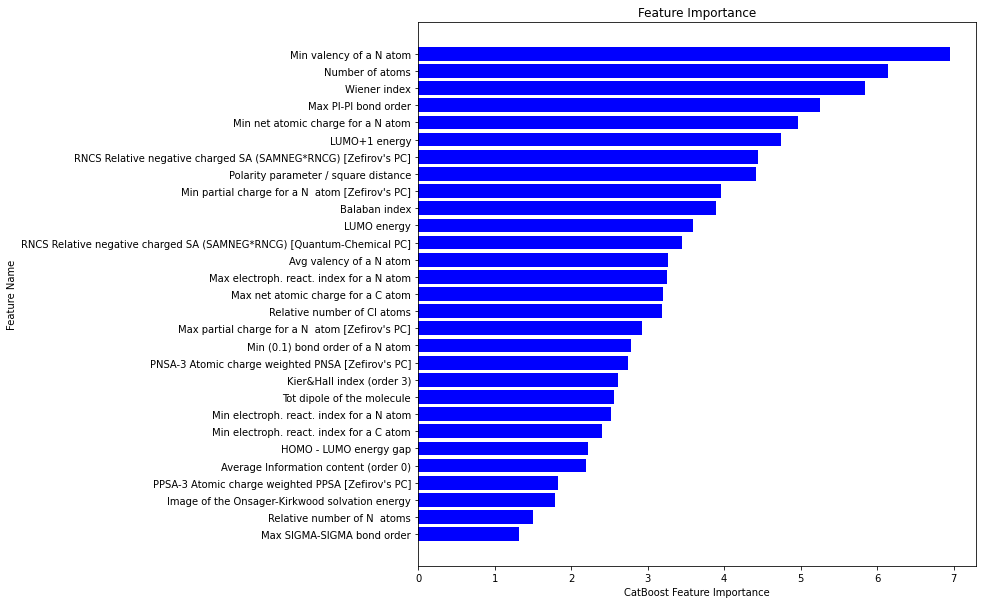

In [45]:
plt.figure(figsize=(10,10))
plt.barh(x.columns[sorted_feature_importance], 
        regressor.feature_importances_[sorted_feature_importance], align='center',alpha=1,
        color='blue')
plt.xlabel("CatBoost Feature Importance")
plt.ylabel("Feature Name")
plt.title('Feature Importance')

In [46]:
import shap

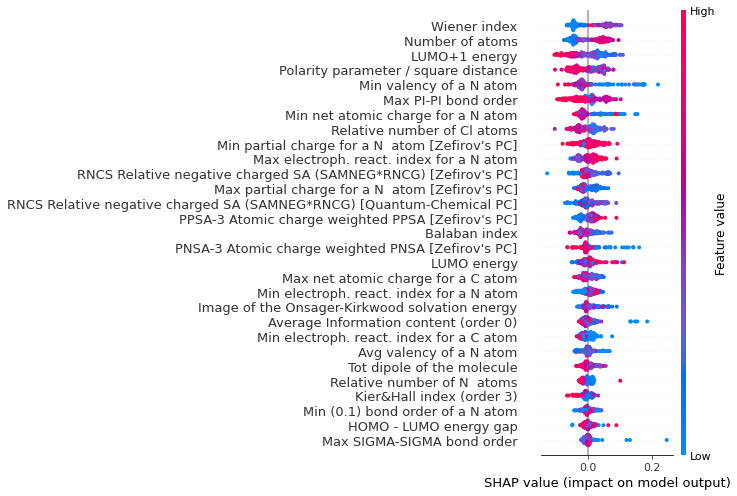

In [66]:
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test, x.columns, show = False, plot_size=[10,7], max_display=x_test.shape[1])
plt.gcf().set_size_inches(10,7)

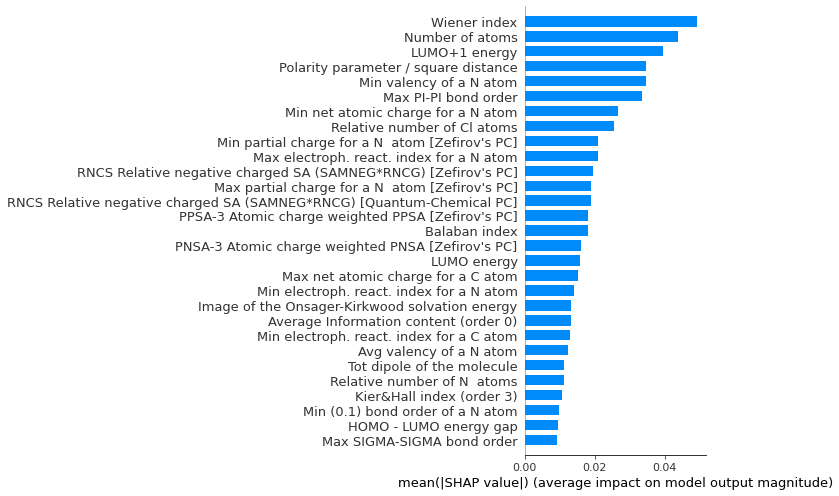

In [68]:
shap.summary_plot(shap_values, x_test,x.columns, plot_type="bar", max_display=x.shape[0], plot_size=[10,7])

In [83]:
shap_values.shape

(844, 29)

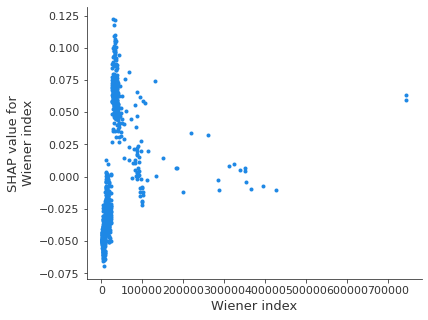

In [126]:
shap.dependence_plot("Wiener index", shap_values, x_train, x.columns, interaction_index=None)

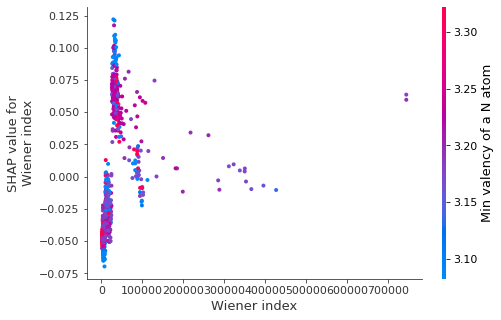

In [93]:
shap.dependence_plot("Wiener index", shap_values, x_train, x.columns, interaction_index="auto")

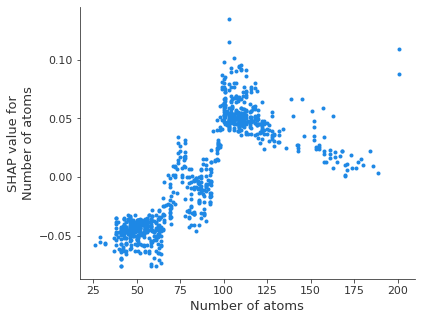

In [94]:
shap.dependence_plot("Number of atoms", shap_values, x_train, x.columns, interaction_index=None)

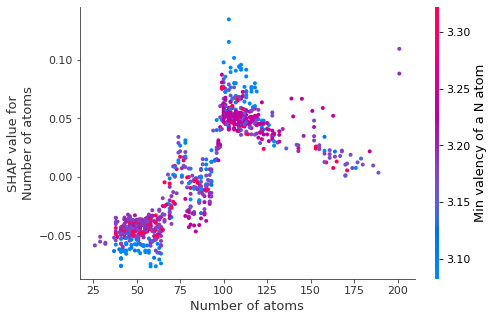

In [95]:
shap.dependence_plot("Number of atoms", shap_values, x_train, x.columns, interaction_index="auto")

In [96]:
random_idx = np.random.randint(len(x_train))
random_idx

303

In [54]:
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(x_train)

In [99]:
shap_explainer_values = explainer(x_train, y_train)

In [100]:
type(shap_explainer_values)

shap._explanation.Explanation

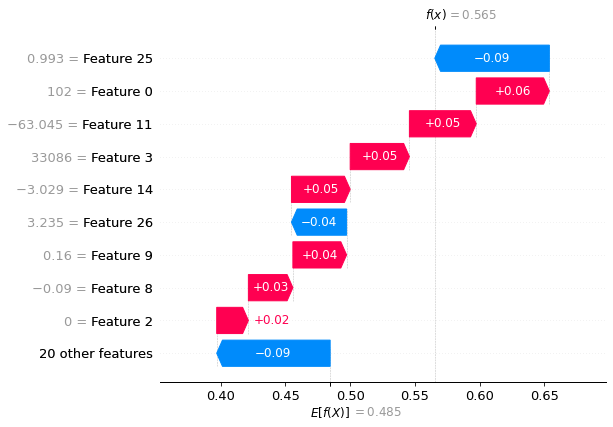

In [116]:
shap.waterfall_plot(shap_explainer_values[843],)

In [109]:
shap.initjs()

In [111]:
shap.force_plot(shap_explainer_values)

In [119]:
shap.force_plot(shap_explainer_values[10,:] ,  x_train, x.columns)

In [123]:
np.random.seed(2021)
random_mask = np.random.choice(a=[0,1], size=y_train.shape, p=[0.9,0.1])
shap.force_plot(explainer.expected_value, pd.DataFrame(shap_values)[random_mask == 1].values, x_train[random_mask == 1])

In [44]:
regressor1 = cb.CatBoostRegressor(loss_function='RMSE')

In [45]:
# parameter tuning grid searchCV
from sklearn.model_selection import GridSearchCV

In [46]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

In [47]:
regressor_grid = GridSearchCV(estimator =regressor1, param_grid=grid,
                              cv = 5, verbose =2,
                              n_jobs= -1,  scoring = "neg_mean_squared_error")



In [48]:
regressor_grid.fit (x_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
0:	learn: 0.4689367	total: 15.8ms	remaining: 3.13s
1:	learn: 0.4455432	total: 114ms	remaining: 11.3s
2:	learn: 0.4262150	total: 208ms	remaining: 13.6s
3:	learn: 0.4093722	total: 332ms	remaining: 16.3s
4:	learn: 0.3928102	total: 424ms	remaining: 16.5s
5:	learn: 0.3795109	total: 519ms	remaining: 16.8s
6:	learn: 0.3635736	total: 607ms	remaining: 16.7s
7:	learn: 0.3510385	total: 711ms	remaining: 17.1s
8:	learn: 0.3392952	total: 755ms	remaining: 16s
9:	learn: 0.3294088	total: 801ms	remaining: 15.2s
10:	learn: 0.3172633	total: 860ms	remaining: 14.8s
11:	learn: 0.3087625	total: 944ms	remaining: 14.8s
12:	learn: 0.3022954	total: 972ms	remaining: 14s
13:	learn: 0.2937857	total: 1.01s	remaining: 13.5s
14:	learn: 0.2876662	total: 1.07s	remaining: 13.2s
15:	learn: 0.2809152	total: 1.13s	remaining: 13s
16:	learn: 0.2744983	total: 1.18s	remaining: 12.7s
17:	learn: 0.2686630	total: 1.23s	remaining: 12.4s
18:	learn: 0.2631851	total: 1.29s	r

165:	learn: 0.0476770	total: 6.95s	remaining: 1.42s
166:	learn: 0.0472717	total: 6.99s	remaining: 1.38s
167:	learn: 0.0468148	total: 7.01s	remaining: 1.34s
168:	learn: 0.0462071	total: 7.05s	remaining: 1.29s
169:	learn: 0.0455765	total: 7.08s	remaining: 1.25s
170:	learn: 0.0450752	total: 7.11s	remaining: 1.21s
171:	learn: 0.0445131	total: 7.15s	remaining: 1.16s
172:	learn: 0.0441724	total: 7.19s	remaining: 1.12s
173:	learn: 0.0436072	total: 7.22s	remaining: 1.08s
174:	learn: 0.0433001	total: 7.25s	remaining: 1.04s
175:	learn: 0.0430445	total: 7.32s	remaining: 998ms
176:	learn: 0.0427866	total: 7.35s	remaining: 956ms
177:	learn: 0.0421908	total: 7.38s	remaining: 913ms
178:	learn: 0.0420615	total: 7.42s	remaining: 870ms
179:	learn: 0.0418011	total: 7.45s	remaining: 828ms
180:	learn: 0.0412746	total: 7.48s	remaining: 785ms
181:	learn: 0.0408766	total: 7.5s	remaining: 742ms
182:	learn: 0.0406680	total: 7.53s	remaining: 700ms
183:	learn: 0.0404261	total: 7.57s	remaining: 658ms
184:	learn: 0

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001873673E3A0>,
             n_jobs=-1,
             param_grid={'depth': [2, 4, 6, 8], 'iterations': [100, 150, 200],
                         'l2_leaf_reg': [0.2, 0.5, 1, 3],
                         'learning_rate': [0.03, 0.1]},
             scoring='neg_mean_squared_error', verbose=2)

In [49]:
regressor_grid.best_params_

{'depth': 8, 'iterations': 200, 'l2_leaf_reg': 0.2, 'learning_rate': 0.1}

In [50]:
regressor_grid.best_score_

-0.07660191515400258

In [33]:
from sklearn.datasets import make_hastie_10_2
from sklearn.inspection import PartialDependenceDisplay

In [34]:
PartialDependenceDisplay.from_estimator(regressor, x_train, features, target=0)

AttributeError: type object 'PartialDependenceDisplay' has no attribute 'from_estimator'

In [43]:
shap.plots.waterfall(shap_values[x_train])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices